## Take Home project         
#### Fanbo Meng:   email: fanbomeng23@gmail.com

### This note book in general consist four parts:
#### 1. General overview of the data set, some discussion and thinking path during the processing
#### 2. There are 15 variables in the data, each of them are carefully study and processed, missing data are dealed
#### 3. Trainging an test the data with 5 different models,  SVM, Logistic regression, Navie bayes, Neuro Networks, Random Forest, accuracy, classification report, AUROC, confusion matrix are checked. For the models, Neuro Networks and Random Forest, grid search  are used to see if better results can be achieved
#### 4. The summary


## Part 1: General Overview

### import and checking the basic information about the data

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [339]:
train_data=pd.read_csv('au_train.csv')
test_data=pd.read_csv('au_test.csv')
train_data_back=pd.read_csv('au_train.csv')

In [370]:
test_data_back=pd.read_csv('au_test.csv')

In [186]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
print('the variables in the data \n {}'.format(list(train_data.keys())))

the variables in the data 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
class             16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


### COMMENT:  
#### the data has no missing value in both training and testing data, but there are fields use ? as input so further check needs

### checking all of the unique inputs in the data set

In [24]:
for name in train_data.keys():
    print('name and the lables {} \n {} '.format(name,train_data[name].unique()))
    print('{}'.format('-'*80))

name and the lables age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 
--------------------------------------------------------------------------------
name and the lables workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 
--------------------------------------------------------------------------------
name and the lables fnlwgt 
 [ 77516  83311 215646 ...  34066  84661 257302] 
--------------------------------------------------------------------------------
name and the lables education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 
------------------------------------------------

In [16]:
test_data['class'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

### COMMENT: 
#### 1. '?'  shows up in occupation, nation and workclass, which stand for the class that is not known in general, so check will be needed to see how many data points hold ? value. In the class column, in only two values are there and no missing values in training data, so as in the test data set

#### 2. There are a couple of un-continues varialbes: workclass, education, education number, marital status, occupation, relationship, race, sex,  native country and the label class, the class

## Part 2: variable study and modification

#### the general weight variable fnlwgt, which is the number that the creater of the dataset believes that how many people each input can represent, each entry is a large number, so I will normalize it with MinMax Scale

#### COMMENT: the weight variable will be considered when necessary

In [340]:
train_data.fnlwgt=(train_data.fnlwgt-train_data.fnlwgt.min())/(train_data.fnlwgt.max()-train_data.fnlwgt.min())
test_data.fnlwgt=(test_data.fnlwgt-test_data.fnlwgt.min())/(test_data.fnlwgt.max()-test_data.fnlwgt.min())

(array([4.4830e+03, 8.6340e+03, 1.0945e+04, 4.3820e+03, 2.5100e+03,
        9.8800e+02, 3.4100e+02, 1.3600e+02, 6.4000e+01, 3.8000e+01,
        1.5000e+01, 5.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

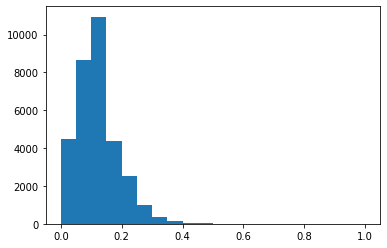

In [7]:
plt.hist(train_data.fnlwgt,bins=20)

### __Frist__: checking the number of '?' in data variables

In [8]:
print('percentage of ? in occupation in train data {:.2%}'.format(train_data[train_data.occupation==' ?'].fnlwgt.sum()/train_data.fnlwgt.sum()))
print('percentage of ? in workclass in train data {:.2%}'.format(train_data[train_data.workclass==' ?'].fnlwgt.sum()/train_data.fnlwgt.sum()))
print('percentage of ? in native-country in train data {:.2%}'.format(train_data[train_data['native-country']==' ?'].fnlwgt.sum()/train_data.fnlwgt.sum()))


percentage of ? in occupation in train data 5.62%
percentage of ? in workclass in train data 5.60%
percentage of ? in native-country in train data 1.83%


### COMMENT:
#### there seems that not much '?' in the data, in working class and workclass, just on naive look, to me it can be viewed as a sub-small class, but not in native-country. Later by the time of processing this unknown data, further discuss will be shown

In [324]:
### Check the size of training and orignal training data, in case no mistake is made during the modification
def printsize():
    print(train_data.shape,train_data_back.shape)

In [10]:
printsize()

(32561, 15) (32561, 15)


### Second, deal with the none-continues data

### 1. Variable 'class': it can be change to >50K to be 1 and <=50k to be 0   as  two classes, add new column call label_class, as the original one, sometimes used in plotting

In [341]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(train_data['class'])
train_data['label_class']=le.transform(train_data['class'])

In [11]:
import sklearn
print(sklearn.__version__)

0.22.1


In [19]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,workclass_copy,label_class
0,39,State-gov,0.044302,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,State-gov,0
1,50,Self-emp-not-inc,0.048238,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc,0
2,38,Private,0.138113,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,0
3,53,Private,0.151068,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private,0
4,28,Private,0.221488,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,0


In [342]:
le.fit(test_data['class'])
le.transform(test_data['class'])
test_data['label_class']=le.transform(test_data['class'])

In [525]:
printsize()

(32561, 16) (32561, 15)


### 2 The label variable workclass

In [21]:
train_data.groupby(['workclass','class']).count()['label_class']

workclass          class 
 ?                  <=50K     1645
                    >50K       191
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
 Private            <=50K    17733
                    >50K      4963
 Self-emp-inc       <=50K      494
                    >50K       622
 Self-emp-not-inc   <=50K     1817
                    >50K       724
 State-gov          <=50K      945
                    >50K       353
 Without-pay        <=50K       14
Name: label_class, dtype: int64

#### Check the distribution of the workclass

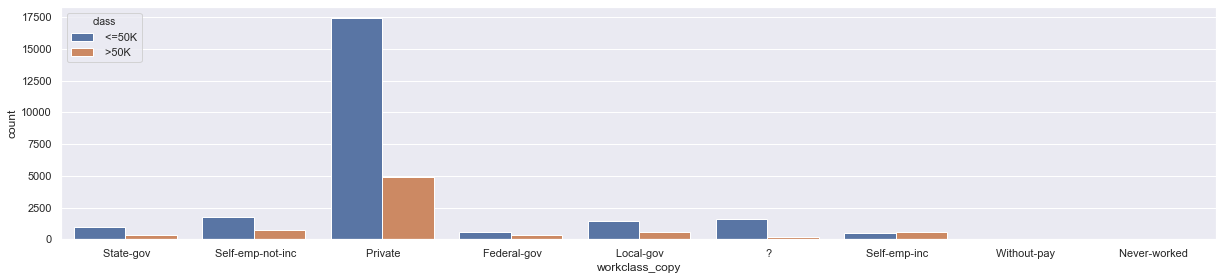

In [499]:
sns.set(rc={'figure.figsize':(20.7,4.27)})
sns.countplot(x="workclass_copy",hue='class', data=train_data)

### COMMENT:
#### there are around 5% of unknown data, however this is categrorical data, I want to see if we can infer anything out of it, possibly recover some

In [233]:
train_data[train_data.workclass==' ?'].head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,label_class,workclass_copy
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,1,?
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,0,?
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,0,?
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,0,?
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,0,?
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K,0,?
149,43,?,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K,0,?
154,52,?,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,>50K,1,?
160,68,?,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,<=50K,0,?
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K,0,?


### COMMENT:
#### it seems workclass is unknown, then occupation is also unknown, start checking their relationship

In [231]:
print('total number of unknown workclass {} \ntotal number of unknown occupation {}'.format(train_data[train_data.workclass==' ?'].shape,train_data[train_data.occupation==' ?'].shape))

total number of unknown workclass (1836, 17) 
total number of unknown occupation (1843, 17)


In [222]:
train_data[train_data.workclass==' ?'].occupation.unique()

array([' ?'], dtype=object)

In [232]:
train_data[train_data.occupation==' ?'].workclass.unique()

array([' ?', ' Never-worked'], dtype=object)

In [236]:
train_data[train_data.workclass==' ?'].groupby('class').count()['occupation']

class
 <=50K    1645
 >50K      191
Name: occupation, dtype: int64

### COMMENT:

#### we can see that all of the unknown workclass hold unknow occupation, while all of the unknow occupations have either unknown workclass or as Never-worked
#### the unknown workclass hold very low >50K percentage, besides the no pay group. 
#### In the below figure, the unknown workclass is relatively concentrage on young age(<30) and elder people(>60). 

#### So for now, from my judgement, I will consider these unknow group as a category of unknow, instead of a group that is missed recorded, though there must be ones that are missed recored.  

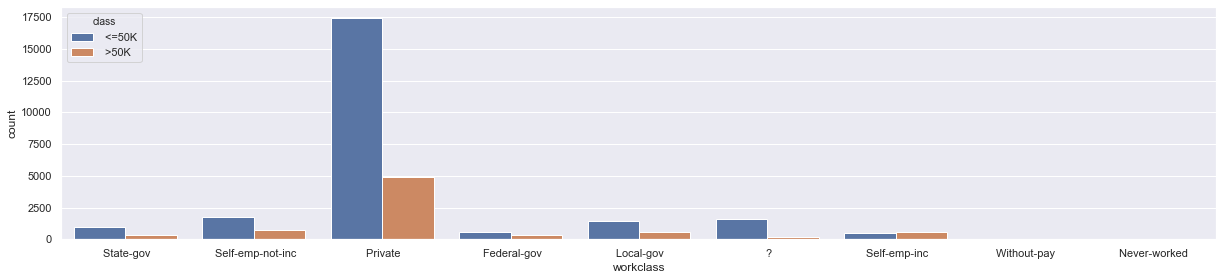

In [327]:
sns.set(rc={'figure.figsize':(20.7,4.27)})
sns.countplot(x="workclass",hue='class', data=train_data_back)

In [527]:
workclass_unknown_analysis=train_data[train_data.workclass==' ?']

(array([33.05222627, 25.91244006, 18.79479361,  5.99041849, 11.6570958 ,
         5.54175439,  9.78582673,  6.22224501,  2.61765665,  5.43727197,
         3.07770609,  3.33840073,  1.91214599,  5.02524076,  1.86419772,
         3.28071135,  4.70954008,  4.13034732, 10.50887994,  6.11662977,
         9.66827536,  5.63222858,  3.72271091,  3.48824996,  2.40693348,
         1.67757569,  0.8331074 ,  0.48301775,  0.05301001,  0.58850803]),
 array([17.        , 19.43333333, 21.86666667, 24.3       , 26.73333333,
        29.16666667, 31.6       , 34.03333333, 36.46666667, 38.9       ,
        41.33333333, 43.76666667, 46.2       , 48.63333333, 51.06666667,
        53.5       , 55.93333333, 58.36666667, 60.8       , 63.23333333,
        65.66666667, 68.1       , 70.53333333, 72.96666667, 75.4       ,
        77.83333333, 80.26666667, 82.7       , 85.13333333, 87.56666667,
        90.        ]),
 <a list of 30 Patch objects>)

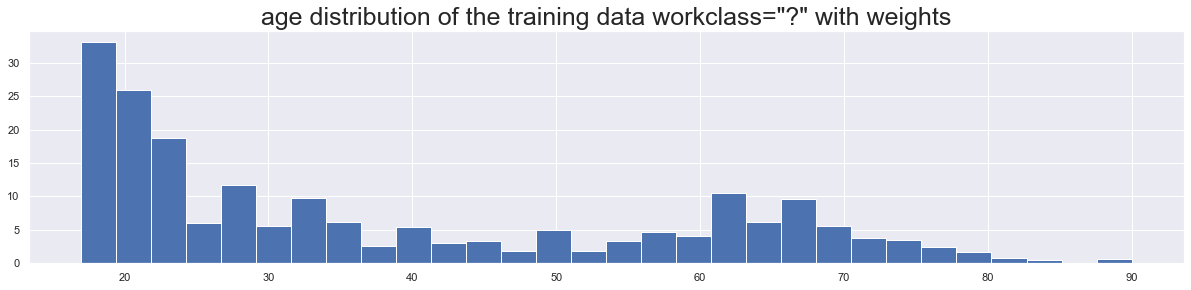

In [529]:
plt.title('age distribution of the training data workclass="?" with weights',fontsize=25)
plt.hist(workclass_unknown_analysis[workclass_unknown_analysis.label_class==0].age,weights=workclass_unknown_analysis[workclass_unknown_analysis.label_class==0].fnlwgt,bins=30)


In [269]:
printsize()

(32561, 17) (32561, 15)


###  DISCUSS: 



####    For sure the two class Never-worded and Without-pay will be <=50k besides the extrame cases, so these two can merge. still they have very few events, so the unknow class will also goes with it, this call will be call income_L, label as 0 

####  Other classes, besides the Private, they all have very few entries, so based on the plot, number distribution in each classes and a blow plot, which is the ratio of 50K/(total), this workclass is grouped into 3 groups, the ? goes together with the No_work_or_no_pay group, label 0, the private label as 1 and all ther others goes to label 2

In [343]:
tmp=train_data[train_data.workclass!=' Without-pay']
tmp=tmp[tmp.workclass!=' Never-worked']

In [346]:
tmp.groupby(['workclass','class']).sum()['fnlwgt']

workclass          class 
 ?                  <=50K     197.529146
                    >50K       22.218438
 Federal-gov        <=50K      68.631447
                    >50K       44.120889
 Local-gov          <=50K     174.883030
                    >50K       75.799801
 Private            <=50K    2186.040867
                    >50K      595.878685
 Self-emp-inc       <=50K      51.924530
                    >50K       72.146808
 Self-emp-not-inc   <=50K     197.920949
                    >50K       83.931630
 State-gov          <=50K     109.838276
                    >50K       41.656130
Name: fnlwgt, dtype: float64

In [359]:
def ratio_plot(df,variable):  
    class_ratio=[]
    indexlist=list(df.groupby([variable,'class']).count()['label_class'].index)
    marry_list=df.groupby([variable,'class']).sum()['fnlwgt']
   # print(marry_list)
 
    i=0
    while i<len(indexlist)-1:
       # if indexlist[i][0]==' Private':
     #   print(marry_list[i],marry_list[i+1])
        class_ratio.append([indexlist[i][0],marry_list[i+1]/(marry_list[i]+marry_list[i+1])])
       # education_class_ratio[education_indexlist[i][0]]=education_list[i+1]/(education_list[i]+education_list[i+1])

        i+=2 
   # print(class_ratio)
    class_ratio=sorted(class_ratio, key = lambda x: x[1])
    x, y = zip(*class_ratio) # unpack a list of pairs into two tuples
    plt.figure(num=None, figsize=(25, 5), dpi=80, facecolor='w', edgecolor='k')
    #print(class_ratio)
    plt.bar(x,y)
    plt.title('ratio of  (Num of >50k) / (total_Num) of different '+variable +' Weighted' ,fontsize=25)

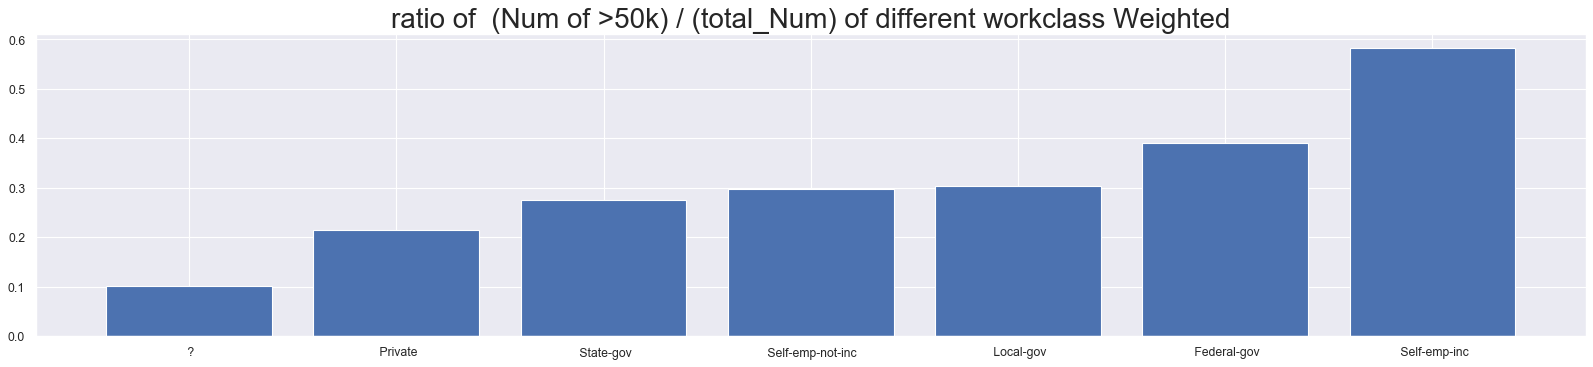

In [360]:
ratio_plot(tmp,'workclass')

In [361]:
def data_frame_regroup(df,number_of_groups,group_name_list,general_variable):
    for group in range(number_of_groups):
        for sub_category in group_name_list[group]:
            df.loc[df[general_variable]==sub_category,general_variable]=group

In [374]:
data_frame_regroup(train_data,3,[[' Never-worked',' Without-pay',' ?'],\
                                 [ ' Private'],[' State-gov', ' Self-emp-not-inc',' Federal-gov',\
                                                ' Local-gov',' Self-emp-inc',]],'workclass')



In [375]:
data_frame_regroup(test_data,3,[[' Never-worked',' Without-pay',' ?'],\
                                 [ ' Private'],[' State-gov', ' Self-emp-not-inc',' Federal-gov',\
                                                ' Local-gov',' Self-emp-inc',]],'workclass')

In [378]:
printsize()

(32561, 16) (32561, 15)


### 3. label eduation processing

### Discussion
#### the following two tables are education in different class, the first one is just count without weights, the second one is with weight,  the difference in ratio is small, but there are difference

In [537]:
train_data.groupby(['education','class']).count()['label_class']

education      class 
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3134
                >50K     2221
 Doctorate      <=50K     107
                >50K      306
 HS-grad        <=50K    8826
                >50K     1675
 Masters        <=50K     764
                >50K      959
 Preschool      <=50K      51
 Prof-school    <=50K     153
                >50K      423
 Some-college   <=50K    5904
                >50K     1387
Name: label_class, dtype: int64

In [552]:
train_data.groupby(['education','class'])['fnlwgt'].sum()

education      class 
 10th           <=50K     109.122039
                >50K        7.816596
 11th           <=50K     139.384158
                >50K        6.366114
 12th           <=50K      50.493237
                >50K        4.443409
 1st-4th        <=50K      25.016169
                >50K        0.886104
 5th-6th        <=50K      48.095862
                >50K        1.695903
 7th-8th        <=50K      72.700385
                >50K        4.426410
 9th            <=50K      63.576908
                >50K        2.819116
 Assoc-acdm     <=50K      99.026394
                >50K       32.237385
 Assoc-voc      <=50K     117.559393
                >50K       41.673506
 Bachelors      <=50K     371.288153
                >50K      267.967799
 Doctorate      <=50K      12.130320
                >50K       36.791104
 HS-grad        <=50K    1067.672672
                >50K      196.464952
 Masters        <=50K      85.821105
                >50K      110.263277
 Preschool      

### COMMENT:
#### there are 16 class in the education categoray, merge some of the class that close to each other will improve the number of events in each class and improve the accuracy 

#### Checking the percentage of >50k in each of the class will help in select if the close classes can merge

<BarContainer object of 16 artists>

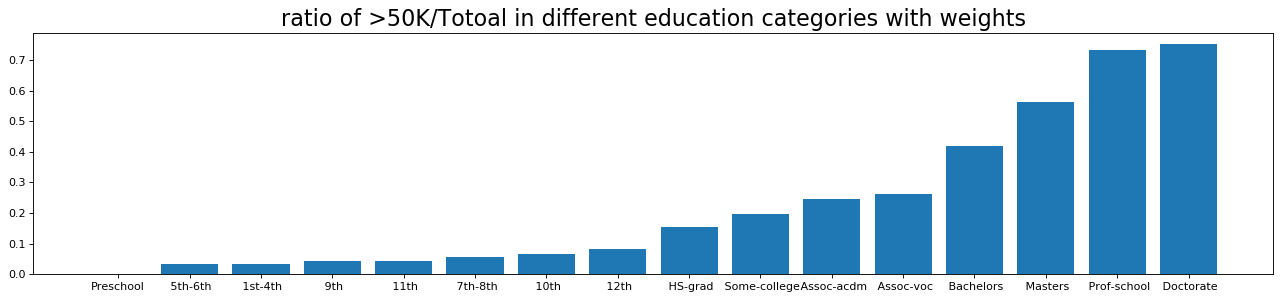

In [24]:
education_class_ratio=[]
education_indexlist=list(train_data.groupby(['education','class']).count()['label_class'].index)
education_list=train_data.groupby(['education','class'])['fnlwgt'].sum()
i=0
while i<len(education_indexlist)-1:
    if education_indexlist[i]==(' Preschool', ' <=50K'):
        i+=1
        continue
    elif education_indexlist[i][0]==education_indexlist[i+1][0]:
        education_class_ratio.append([education_indexlist[i][0],education_list[i+1]/(education_list[i]+education_list[i+1])])
       # education_class_ratio[education_indexlist[i][0]]=education_list[i+1]/(education_list[i]+education_list[i+1])

        i+=2
education_class_ratio.append(['Preschool',0])  
education_class_ratio=sorted(education_class_ratio, key = lambda x: x[1])
education_class_ratio
x, y = zip(*education_class_ratio) # unpack a list of pairs into two tuples
plt.figure(num=None, figsize=(20, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title('ratio of >50K/Totoal in different education categories with weights',fontsize=20)
plt.bar(x,y)

In [25]:
train_data['education_copy']=train_data.education

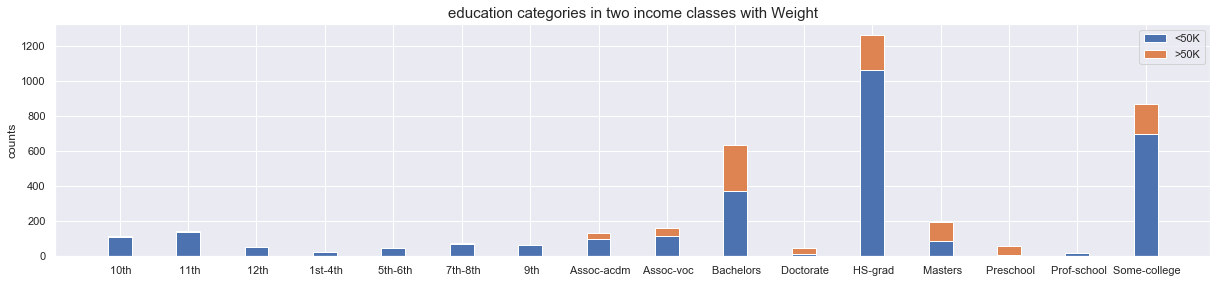

In [638]:
N = 16
Up_50K = list(train_data[train_data.label_class==1].groupby('education').sum()['fnlwgt'])
Up_50K=Up_50K[:-1]+[0.0]+[Up_50K[-1]]
Down_50K = train_data[train_data.label_class==0].groupby('education').sum()['fnlwgt']
#print(Up_50K,Down_50K)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Down_50K, width)
p2 = plt.bar(ind, Up_50K, width,bottom=Down_50K)

plt.ylabel('counts')
plt.title('education categories in two income classes with Weight',fontsize=15)
plt.xticks(ind, list(train_data.groupby('education').sum()['fnlwgt'].index))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('<50K', '>50K'))

plt.show()

In [44]:
def two_class_plot(df,groups,variable,wid):
    N = groups
    Up_50K = train_data[train_data.label_class==1].groupby(variable).sum()['fnlwgt']
    Down_50K = train_data[train_data.label_class==0].groupby(variable).sum()['fnlwgt']
   # print(Up_50K,Down_50K)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence
    plt.figure(num=None, figsize=(wid,4), dpi=80, facecolor='w', edgecolor='k')
    p1 = plt.bar(ind, Down_50K, width)
    p2 = plt.bar(ind, Up_50K, width,bottom=Down_50K)

    plt.ylabel('counts')
    plt.title( variable+' categories in two income classes with Weight',fontsize=15)
    plt.xticks(ind, list(train_data.groupby(variable).sum()['fnlwgt'].index))

    plt.legend((p1[0], p2[0]), ('<=50K', '>50K'))

    plt.show()

### COMMENT: 
#### merge the variables, looking at the above figure, we have from preschool to 12th, they all relatively few years education and hold simiar >=50k/total_# ratio, I called edu_s, 
#### the HS-grad, some-colleague, Assoc-acdm and Assco-voc in a group (I did not find what are the last two stands for, for now, I merge them, later checkes can be preformed) and I call them edu_m, 
#### the last group is Bachelors, Masters, Prof-school, and Doctorate, though the last three in this group, especially the last two have much higher >50k ratio, but the last two are small in number, hard to make them into a stand alone group, I call them edu_h.

In [379]:
for edu in [' 11th',' 9th',' 7th-8th',' 5th-6th',' 10th',' 1st-4th',' Preschool', ' 12th']:
    train_data.loc[train_data.education==edu,'education']='edu_s'

In [380]:
for edu in [' HS-grad',' Some-college',' Assoc-acdm',' Assoc-voc']:
    train_data.loc[train_data.education==edu,'education']='edu_m'
for edu in [' Bachelors',' Masters',' Prof-school',' Doctorate']:
    train_data.loc[train_data.education==edu,'education']='edu_h'    

In [381]:
for edu in [' 11th',' 9th',' 7th-8th',' 5th-6th',' 10th',' 1st-4th',' Preschool', ' 12th']:
    test_data.loc[test_data.education==edu,'education']='edu_s'
    
for edu in [' HS-grad',' Some-college',' Assoc-acdm',' Assoc-voc']:
    test_data.loc[test_data.education==edu,'education']='edu_m'
for edu in [' Bachelors',' Masters',' Prof-school',' Doctorate']:
    test_data.loc[test_data.education==edu,'education']='edu_h'    

In [382]:
le.fit(train_data['education'])
train_data['education']=le.transform(train_data['education'])
#train_data.head(20)

In [383]:
test_data['education']=le.transform(test_data['education'])

In [384]:
printsize()

(32561, 16) (32561, 15)


### comment:
#### the education column in train and test data are now relabeled into three groups

### 4. study education number variable 

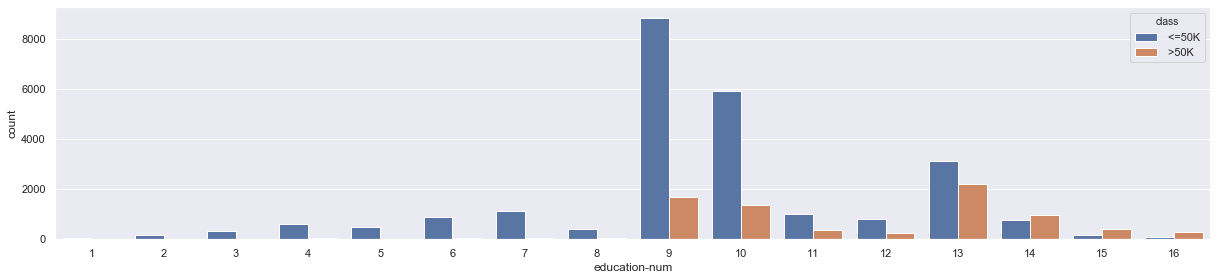

In [656]:
sns.countplot(x="education-num",hue='class', data=train_data)

### COMMENT:
#### Education-num variable is very like the number of education years,  which is likely to have a correlation with education varaible. check will need, on the other hand, if use this variable, re-group this variable is also needed. For now, 1--8 one group called edu_number_s,    9--12 called edu_number_m, at last 12--16 called edu_number_h

In [385]:
for edu in [1,2,3,4,5,6,7,8]:
    train_data.loc[train_data['education-num']==edu,'education-num']=0
for edu in [9,10,11,12]:
    train_data.loc[train_data['education-num']==edu,'education-num']=1   
for edu in [13,14,15,16]:
    train_data.loc[train_data['education-num']==edu,'education-num']=2
    
for edu in [1,2,3,4,5,6,7,8]:
    test_data.loc[test_data['education-num']==edu,'education-num']=0
for edu in [9,10,11,12]:
    test_data.loc[test_data['education-num']==edu,'education-num']=1   
for edu in [13,14,15,16]:
    test_data.loc[test_data['education-num']==edu,'education-num']=2

(2.0, 0.0)

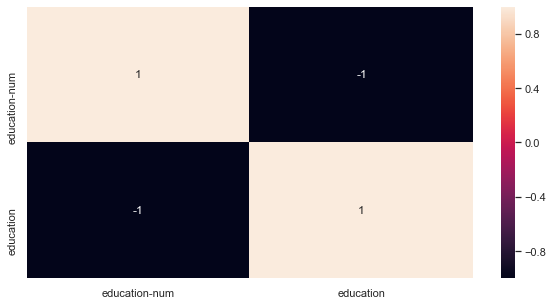

In [658]:
sns.set(rc={'figure.figsize':(10,5)})
correction_matrix=train_data[['education-num','education']].corr()
ax=sns.heatmap(correction_matrix,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### COMMENT:
#### in the way I group the two variables, the education and the education-num, they are totally anti-correlated with each other, while the below plot is I did not make any group, then see the correlation between the two variables, so apparently, less correlation if not grouped.

In [386]:
le.fit(train_data_back['education'])
train_data_back['education']=le.transform(train_data_back['education'])

(2.0, 0.0)

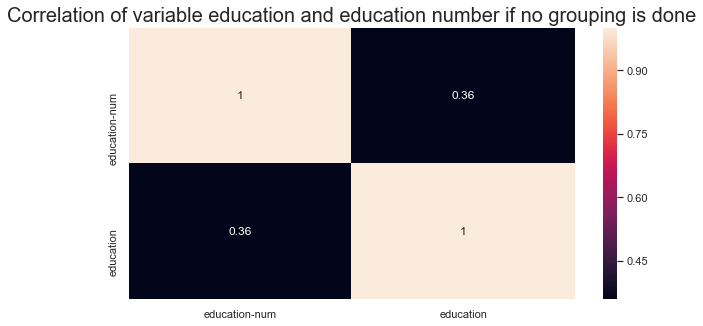

In [388]:
sns.set(rc={'figure.figsize':(10,5)})
correction_matrix=train_data_back[['education-num','education']].corr()
ax=sns.heatmap(correction_matrix,annot=True)
bottom, top = ax.get_ylim()
ax.set_title("Correlation of variable education and education number if no grouping is done",fontsize=20)
ax.set_ylim(bottom + 0.5, top - 0.5)

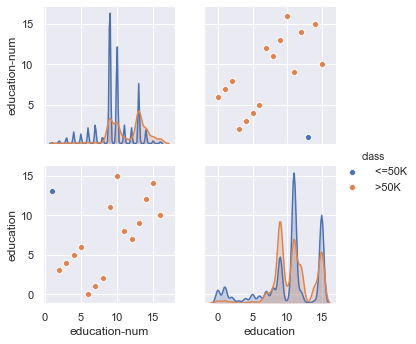

In [392]:
sns.pairplot(vars=['education-num','education'] , data=train_data_back,hue='class') 


### COMMENT:
#### both of these two variables are not that powerful, so for now I will use education-num, they are more or less directly related 

### 5 study with marital status

In [394]:
train_data.groupby(['marital-status','class']).sum()['fnlwgt']

marital-status          class 
 Divorced                <=50K     469.142910
                         >50K       54.443800
 Married-AF-spouse       <=50K       1.700596
                         >50K        1.046754
 Married-civ-spouse      <=50K     976.495268
                         >50K      798.124145
 Married-spouse-absent   <=50K      47.949522
                         >50K        3.393251
 Never-married           <=50K    1267.103429
                         >50K       61.348531
 Separated               <=50K     126.268069
                         >50K        8.892625
 Widowed                 <=50K     100.664575
                         >50K        8.503274
Name: fnlwgt, dtype: float64

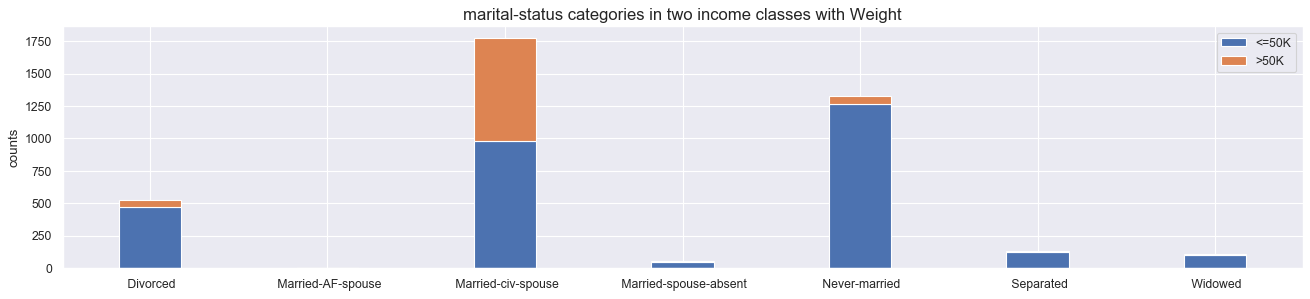

In [397]:
two_class_plot(train_data_back,7,'marital-status',20)

Text(0.5, 1.0, 'martial status counting in each category and each sub group with no weight')

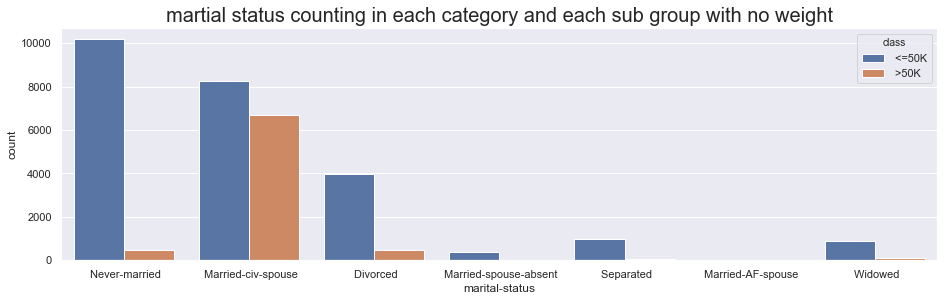

In [669]:
sns.set(rc={'figure.figsize':(15.7,4.27)})
ax=sns.countplot(x="marital-status",hue='class', data=train_data)
ax.set_title("martial status counting in each category and each sub group with no weight",fontsize=20)

### COMMENT:
#### for the data counting plot with or without weight, in the categorical variables, the difference is small, the weight is from variable fnlwgt

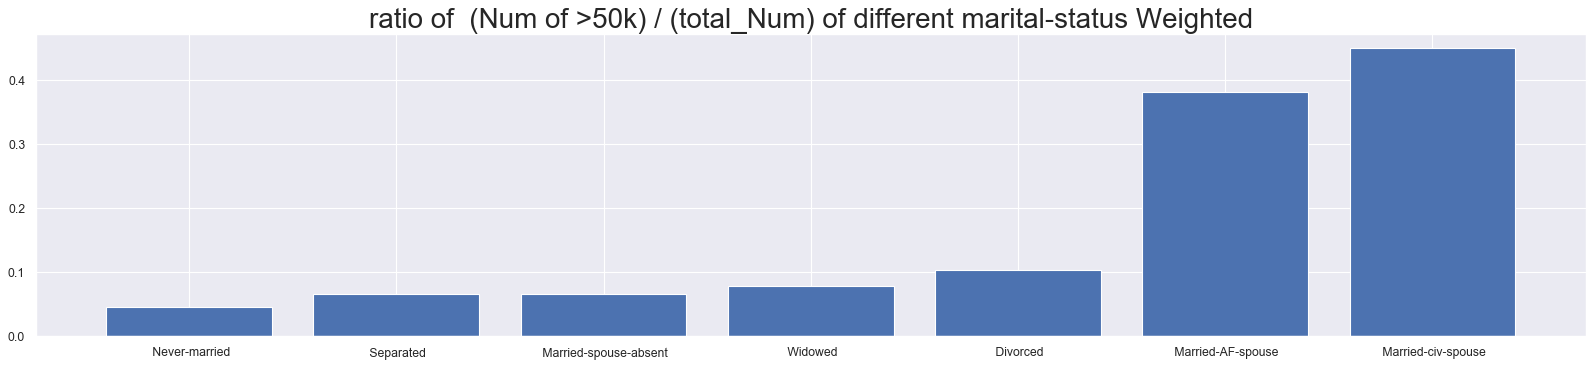

In [674]:
ratio_plot(train_data,'marital-status')

### DISCUSSION
#### Merge these groups into Married_N which includes: Married-AF-spouse, Married-civ-spouse,  they are in group 2, and the others besides Never-married are group 1 and Never-married are group 0

In [56]:
train_data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [398]:
data_frame_regroup(train_data,3,[[' Never-married'],[' Divorced',' Married-spouse-absent',\
                                                     ' Separated',' Widowed'],[' Married-civ-spouse',' Married-AF-spouse']],'marital-status')

data_frame_regroup(test_data,3,[[' Never-married'],[' Divorced',' Married-spouse-absent',\
                                                     ' Separated',' Widowed'],[' Married-civ-spouse',' Married-AF-spouse']],'marital-status')




### 6. study with occupatons

Text(0.5, 1.0, 'occupation counting in each category and each sub group')

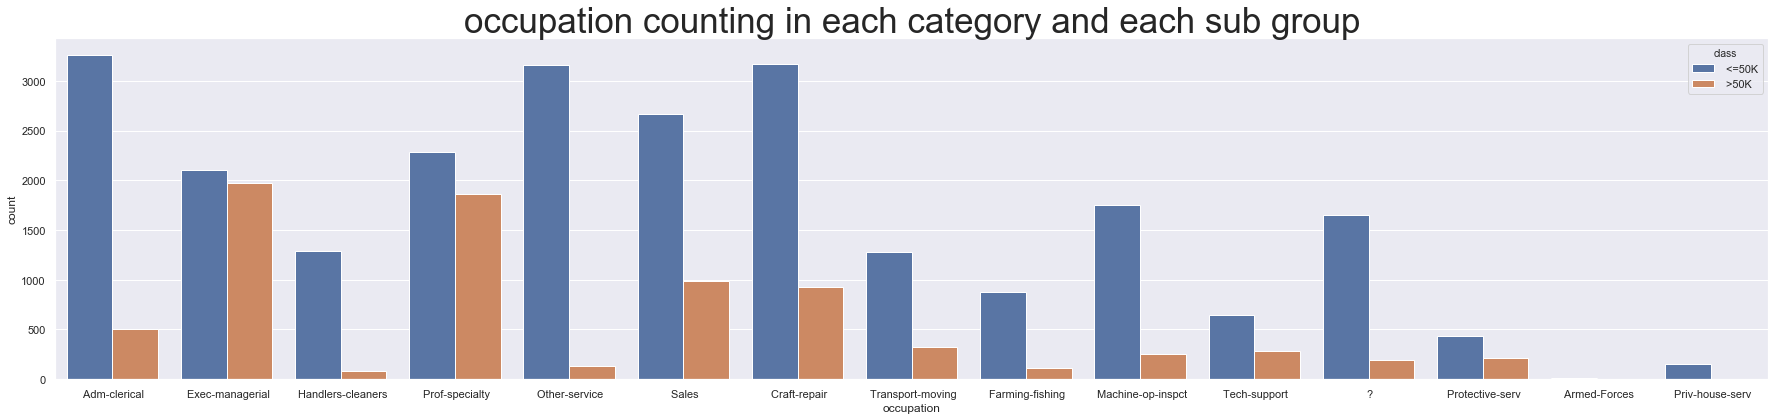

In [676]:
sns.set(rc={'figure.figsize':(30.7,6.27)})
ax=sns.countplot(x="occupation",hue='class', data=train_data)
ax.set_title("occupation counting in each category and each sub group",fontsize=35)

In [59]:
train_data.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

#### apparently, occupation is a variable that can affect income, which is the same as commen sence. I will group the occputation into groups

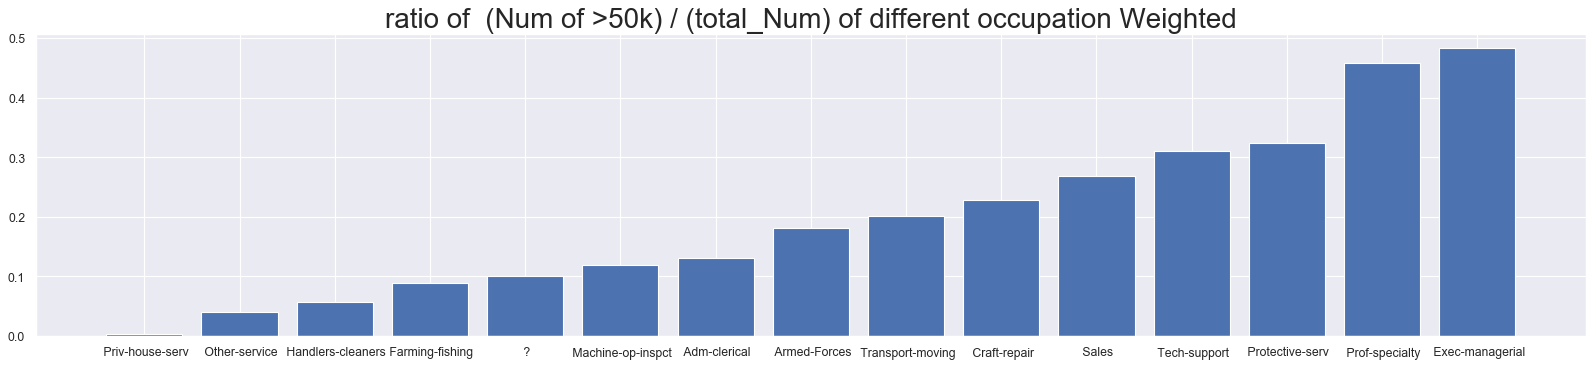

In [681]:
ratio_plot(train_data,'occupation')

Text(0.5, 1.0, 'occupation counting in each category')

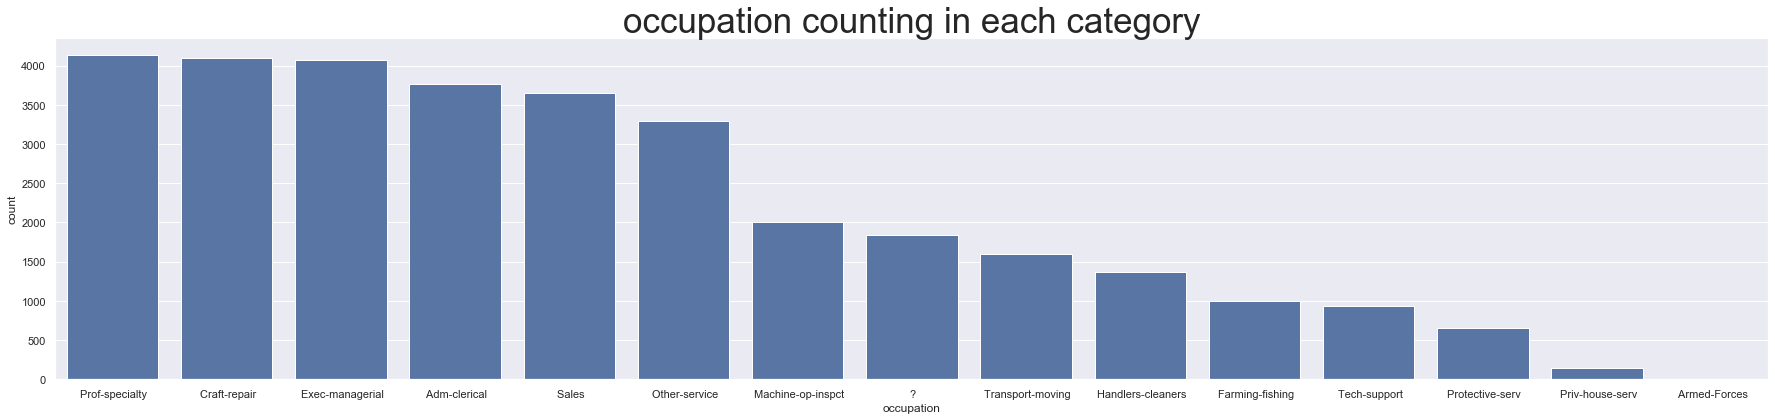

In [682]:
ax=sns.countplot(x='occupation',data=train_data,color='b',order = train_data['occupation'].value_counts().index)
ax.set_title("occupation counting in each category ",fontsize=35)

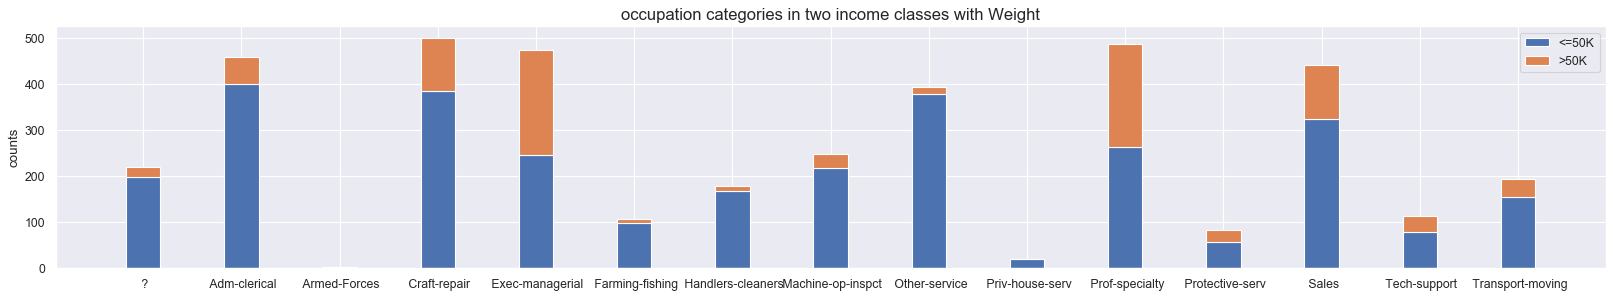

In [400]:
two_class_plot(train_data,15,'occupation',25)

### COMMENT: 
#### Occupation is apparently a good variable for classification, I will group them into three groups, from high >50k income ratio to low ones.
#### Exec-managerial, Prof-speciality, are call occupation_h, labeled 2.  Proective-serv, Tech-support, Sales, Craft-repair, Transport-moving are call occupation_m labeled 1, all the remainings, Adm-clerical, Machine-op-inspct, Farming-fishing, Armed-force, ? Handiers-cleaners, Other-service and Priv-house-serv labeled 0

In [401]:
for occu in [' Prof-specialty',' Exec-managerial']:
    train_data.loc[train_data['occupation']==occu,'occupation']=2
for occu in [' Protective-serv',' Tech-support',' Sales',' Craft-repair',' Transport-moving']:
    train_data.loc[train_data['occupation']==occu,'occupation']=1   
for occu in [' Adm-clerical',' Machine-op-inspct',' Farming-fishing',' Armed-Forces',' ?',' Handlers-cleaners',' Other-service',' Priv-house-serv']:
    train_data.loc[train_data['occupation']==occu,'occupation']=0

for occu in [' Prof-specialty',' Exec-managerial']:
    test_data.loc[test_data['occupation']==occu,'occupation']=2
for occu in [' Protective-serv',' Tech-support',' Sales',' Craft-repair',' Transport-moving']:
    test_data.loc[test_data['occupation']==occu,'occupation']=1   
for occu in [' Adm-clerical',' Machine-op-inspct',' Farming-fishing',' Armed-Forces',' ?',' Handlers-cleaners',' Other-service',' Priv-house-serv']:
    test_data.loc[test_data['occupation']==occu,'occupation']=0 

In [402]:
printsize()

(32561, 16) (32561, 15)


### 7. study of variable relationship

Text(0.5, 1.0, 'relationship counting in each category and each sub group not weighted')

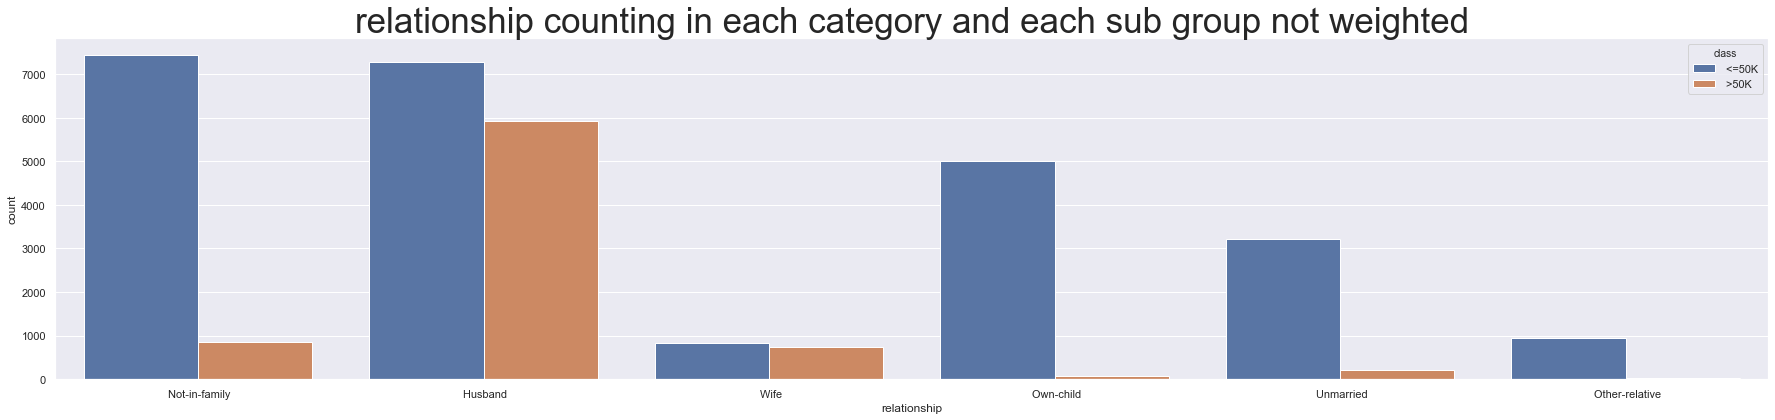

In [49]:
sns.set(rc={'figure.figsize':(30.7,6.27)})
ax=sns.countplot(x="relationship",hue='class', data=train_data)
ax.set_title("relationship counting in each category and each sub group not weighted",fontsize=35)

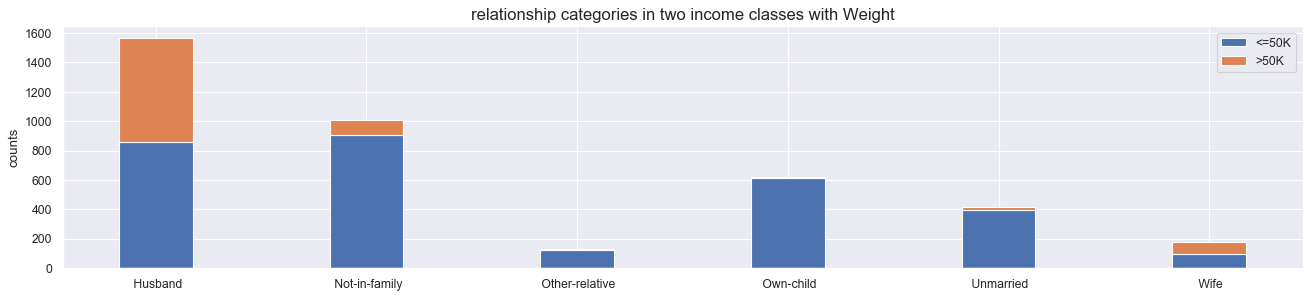

In [48]:
two_class_plot(train_data,6,'relationship',20)

### COMMENT:
#### 3 group still looks like to good grouping to me: one is Husband and Wife, labeled 2,    one is Not-in-family labeled 1, and the remaining are group 0. 

In [403]:
data_frame_regroup(train_data,3,[[' Other-relative',' Unmarried',' Own-child'],\
                                 [' Not-in-family'],[' Husband', ' Wife']],'relationship')
data_frame_regroup(test_data,3,[[' Other-relative',' Unmarried',' Own-child'],\
                                 [' Not-in-family'],[' Husband', ' Wife']],'relationship')

### 8. study of variable race

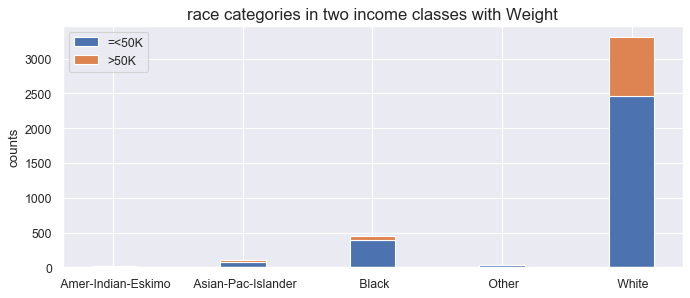

In [707]:
two_class_plot(train_data,5,'race',18)

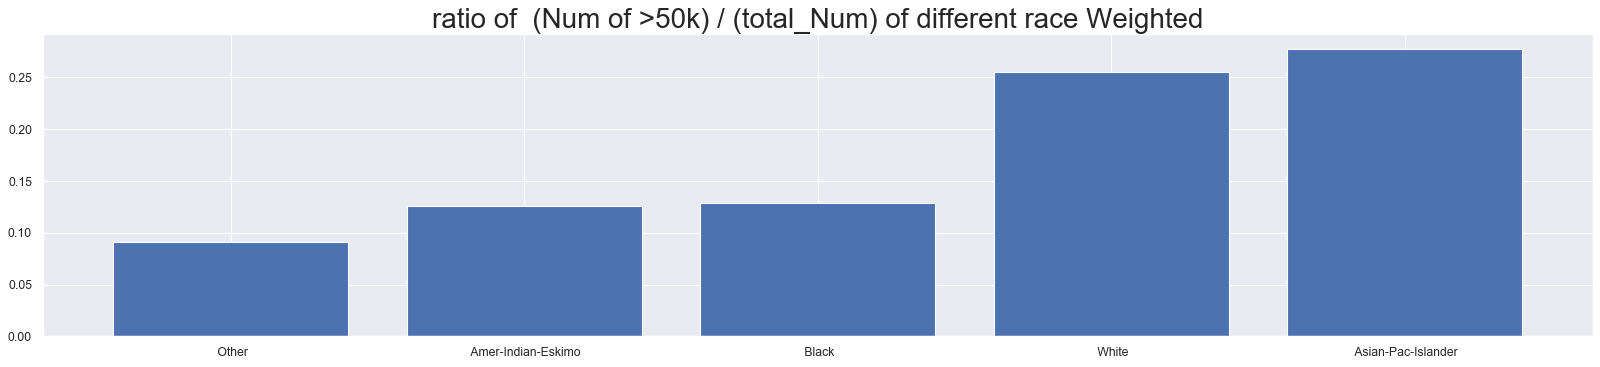

In [708]:
ratio_plot(train_data,'race')

In [709]:
train_data.groupby(['race','class']).sum()['fnlwgt']

race                 class 
 Amer-Indian-Eskimo   <=50K      20.053144
                      >50K        2.873637
 Asian-Pac-Islander   <=50K      75.323482
                      >50K       28.868378
 Black                <=50K     398.857307
                      >50K       58.848144
 Other                <=50K      30.935958
                      >50K        3.083833
 White                <=50K    2464.154478
                      >50K      842.078388
Name: fnlwgt, dtype: float64

In [404]:
data_frame_regroup(train_data,2,[[' White',' Asian-Pac-Islander'],\
                                 [ ' Black',' Amer-Indian-Eskimo',
       ' Other']],'race')
data_frame_regroup(test_data,2,[[' White',' Asian-Pac-Islander'],\
                                 [ ' Black',' Amer-Indian-Eskimo',
       ' Other']],'race')

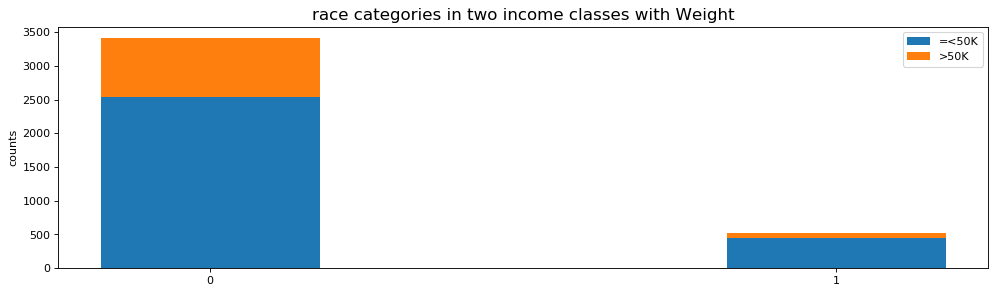

In [43]:
two_class_plot(train_data,2,'race',15)

### COMMENT:
#### white race number is too much larger comparied with other group, it is dominent,  the others besides the Asin-Pac-Islander, are all have similar >50k /total ratio, so I tried to group all the remaining into another group and we see that there are some difference in the number of >50K percentage, which make sence

### 9. variable sex 

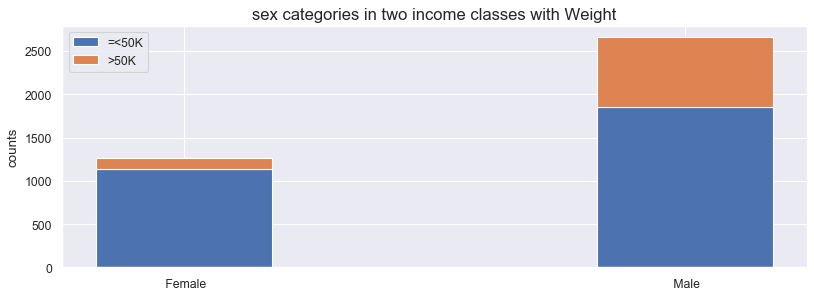

In [715]:
two_class_plot(train_data,2,'sex',12)

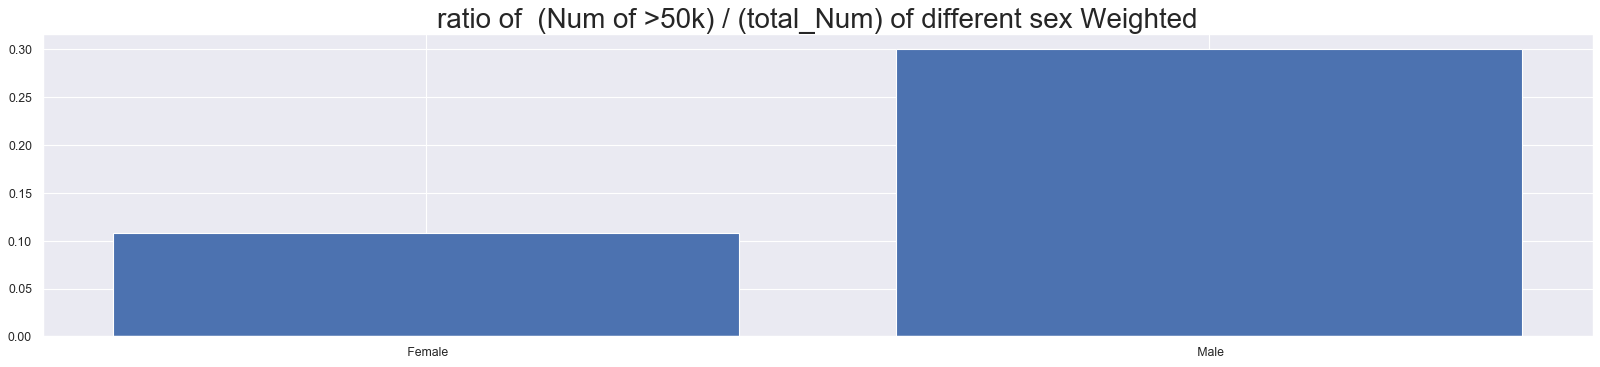

In [716]:
ratio_plot(train_data,'sex')

### COMMENT: 
#### this variable is effective, and only two categories in the data set, so there is not much to do with it, I just keep it as it is

In [405]:
data_frame_regroup(train_data,2,[[' Male'],[' Female']],'sex')
data_frame_regroup(test_data,2,[[' Male'],[' Female']],'sex')

### 10. study with native-country variable

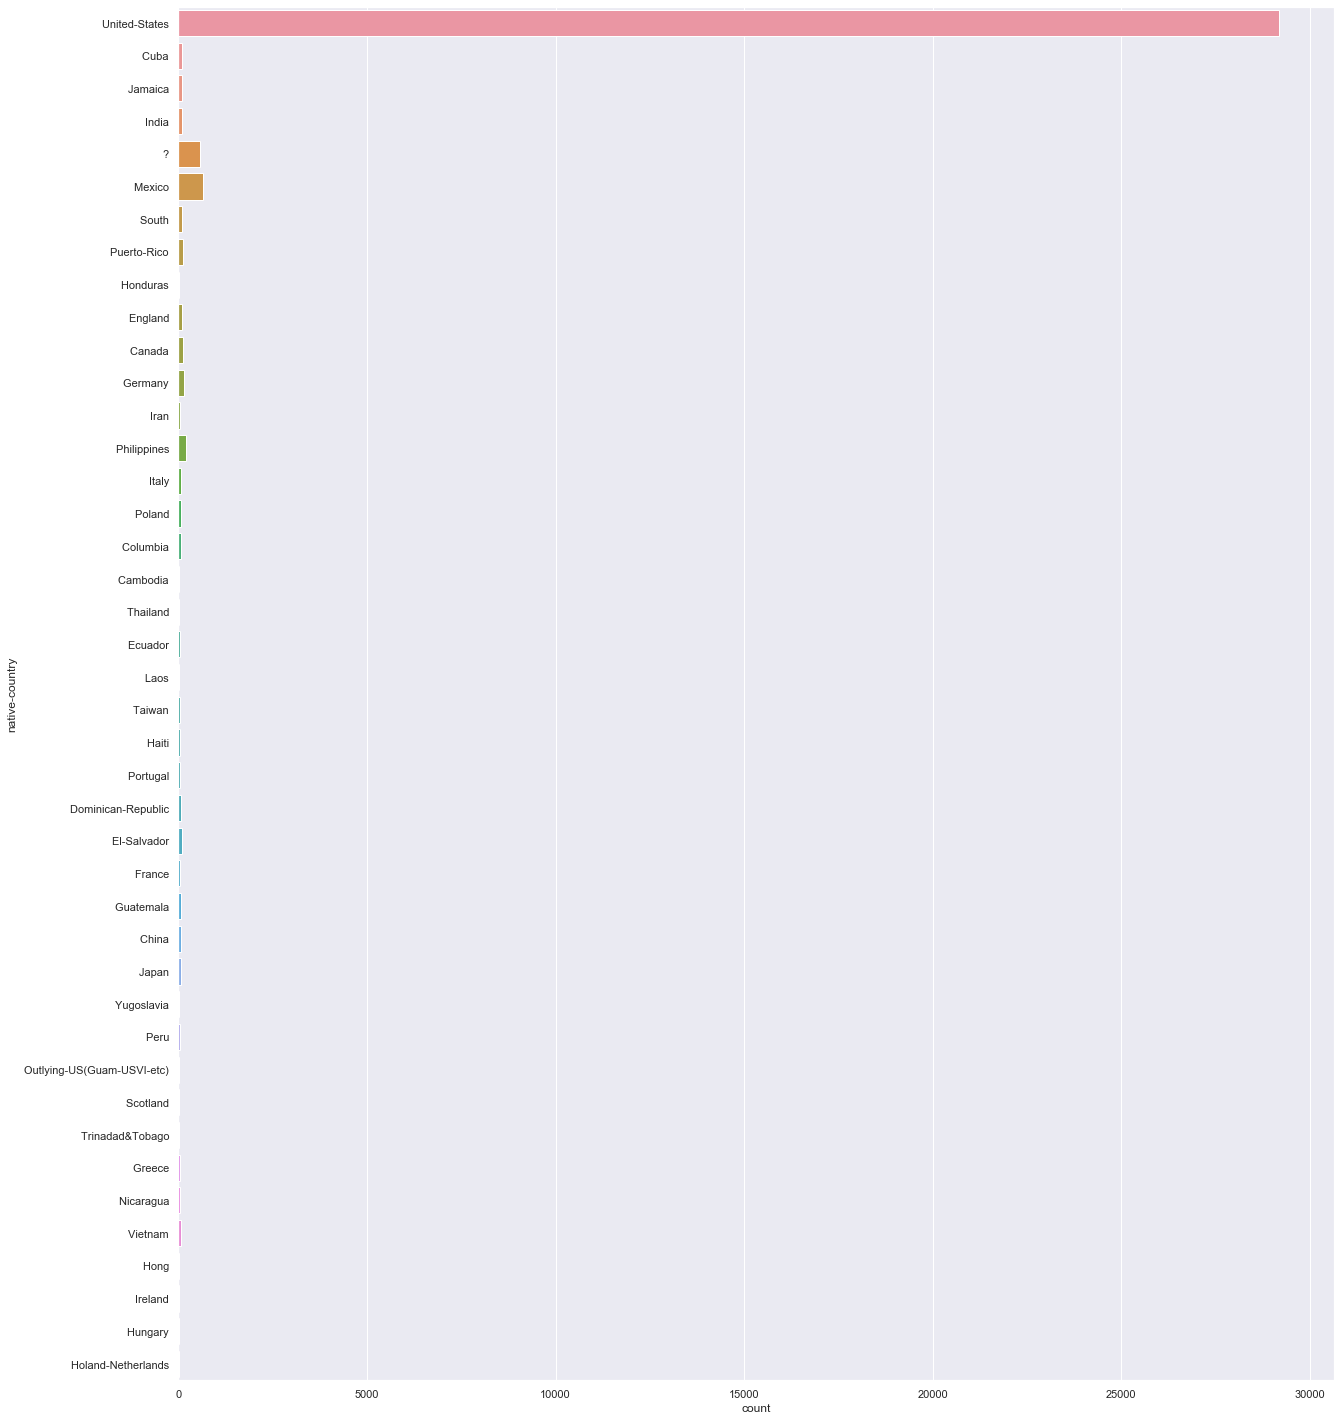

In [421]:
sns.set(rc={'figure.figsize':(20.7,25.27)})
sns.countplot(y='native-country',data=train_data)

In [719]:
top_20_country_list=list(train_data.groupby(['native-country']).sum()['fnlwgt'].nlargest(20).index)

In [720]:
(train_data.groupby(['native-country','class']).sum().loc[top_20_country_list,'fnlwgt'])

native-country       class 
 ?                    <=50K      54.333219
                      >50K       17.339447
 Canada               <=50K       8.743128
                      >50K        5.027210
 China                <=50K       6.103714
                      >50K        2.390618
 Columbia             <=50K       8.161224
                      >50K        0.368272
 Cuba                 <=50K      11.011455
                      >50K        4.086549
 Dominican-Republic   <=50K       8.265602
                      >50K        0.282448
 El-Salvador          <=50K      16.589985
                      >50K        0.839448
 England              <=50K       7.056726
                      >50K        3.339843
 Germany              <=50K      10.906902
                      >50K        5.565655
 Guatemala            <=50K      10.511669
                      >50K        0.479905
 India                <=50K       6.475807
                      >50K        4.136253
 Italy                <=50

### COMMENT(deal with the missing data) : 
#### From the above print out, we see that the missing data '?' has very similar percentge with respect to that of United States. It is around 1/3. As the nation United-States dominent the total population, as we can infer that, even with in the '?' (unknown) data, most of them are from United-States. The missing data is round 1.79% percenate, so I decided to drop it.

In [406]:
train_data=train_data[train_data['native-country']!=' ?']
train_data.shape
test_data=test_data[test_data['native-country']!=' ?']
train_data.shape

(31978, 16)

In [407]:
train_data_back=train_data_back[train_data_back['native-country']!=' ?']

In [408]:
train_data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

### COMMENT:
#### the next action is form two groups, United states and others, then check if these two are different in >50K/total numbers, if not, then drop this variable

In [ ]:
train_data.loc[train_data['native-country']!=' United-States','native-country']=1
train_data.loc[train_data['native-country']==' United-States','native-country']=0


In [410]:
test_data.loc[test_data['native-country']!=' United-States','native-country']=1
test_data.loc[test_data['native-country']==' United-States','native-country']=0

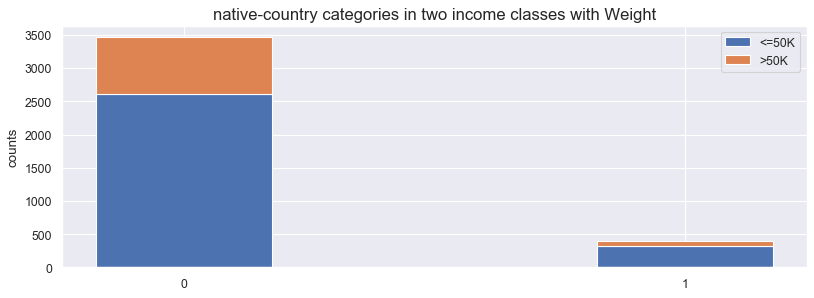

In [413]:
two_class_plot(train_data,2,'native-country',12)

### COMMENT: 
#### the difference between the two group, United States and Others is not very big, to still usable to me

### 11. age variable study 

(array([390.00086117, 515.58264082, 515.86074422, 527.98735619,
        480.65456459, 439.46074625, 336.52826367, 197.8368964 ,
        197.97421931, 125.79754486,  69.85601527,  31.57404477,
         14.56064438,   5.14095978,   4.5885807 ]),
 array([17.        , 21.86666667, 26.73333333, 31.6       , 36.46666667,
        41.33333333, 46.2       , 51.06666667, 55.93333333, 60.8       ,
        65.66666667, 70.53333333, 75.4       , 80.26666667, 85.13333333,
        90.        ]),
 <a list of 15 Patch objects>)

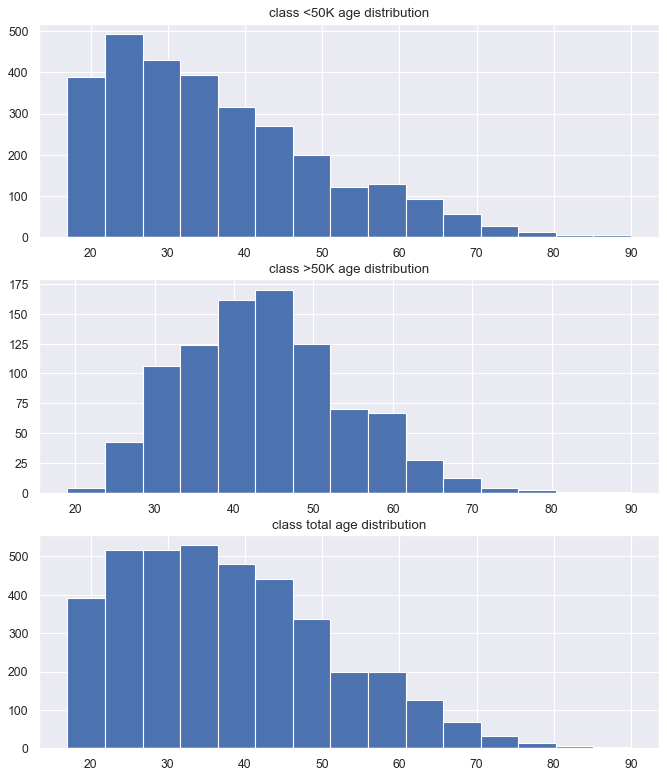

In [729]:
plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(311)
plt.hist(train_data[train_data.label_class==0].age,weights=train_data[train_data.label_class==0].fnlwgt,bins=15)
plt.title('class <50K age distribution')
plt.subplot(312)
plt.title('class >50K age distribution')
plt.hist(train_data[train_data.label_class==1].age,weights=train_data[train_data.label_class==1].fnlwgt,bins=15)
plt.subplot(313)
plt.title('class total age distribution')
plt.hist(train_data.age,weights=train_data.fnlwgt,bins=15)

### COMMENT:  

#### age variable can make a difference based on the fact that the two class group in general have different distribution as shown above. It will be next to determine how to bin it and how many bins and how to bin it, based on the distribution in each class and the total number of events, the largest age is 90 and the smallest is 17 
####  I decide to use the fellowing bining: [15, 25, 35, 45, 55, 65, 90]

In [414]:
def bining(df,list_bin,variable):
    for i in range(len(list_bin)):
        df.loc[df[variable]>=list_bin[i],variable]=i
        
        

In [ ]:
bining(train_data,[65,55,45,35,25,15],'age')

In [416]:
bining(test_data,[65,55,45,35,25,15],'age')

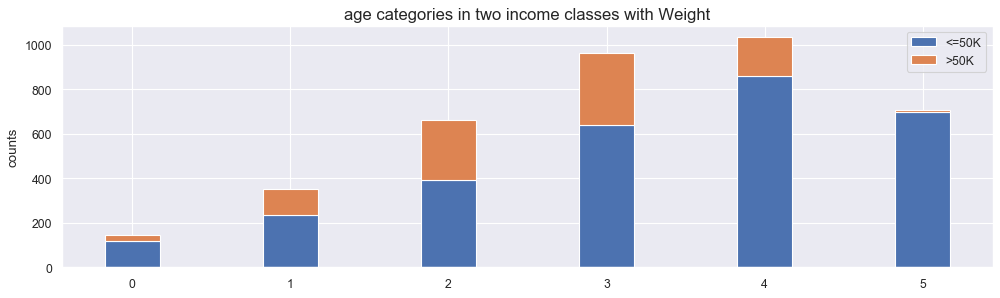

In [417]:
two_class_plot(train_data,6,'age',15)

### 12. Variable captial-loss and capital-gain

#### The definination of captial loss:  A capital loss is the loss incurred when a capital asset, such as an investment or real estate, decreases in value.                                                                                                                                                                                                        

#### The definiation of capital gain: Capital gain is a rise in the value of a capital asset (investment or real estate) that gives it a higher worth than the purchase price

### Comment: the difference of Captial gain and Captial lose will make sence

(array([9.0000e+00, 1.4300e+02, 1.2860e+03, 4.4000e+01, 2.7879e+04,
        1.0600e+02, 2.9200e+02, 3.6300e+02, 3.1200e+02, 1.1500e+02,
        6.3000e+01, 5.3300e+02, 5.5000e+01, 2.5000e+01, 6.1000e+01,
        2.0000e+00, 0.0000e+00, 9.2000e+01, 3.4600e+02, 6.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 3.6000e+01, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.5000e+01, 0.0000e+00,
        3.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

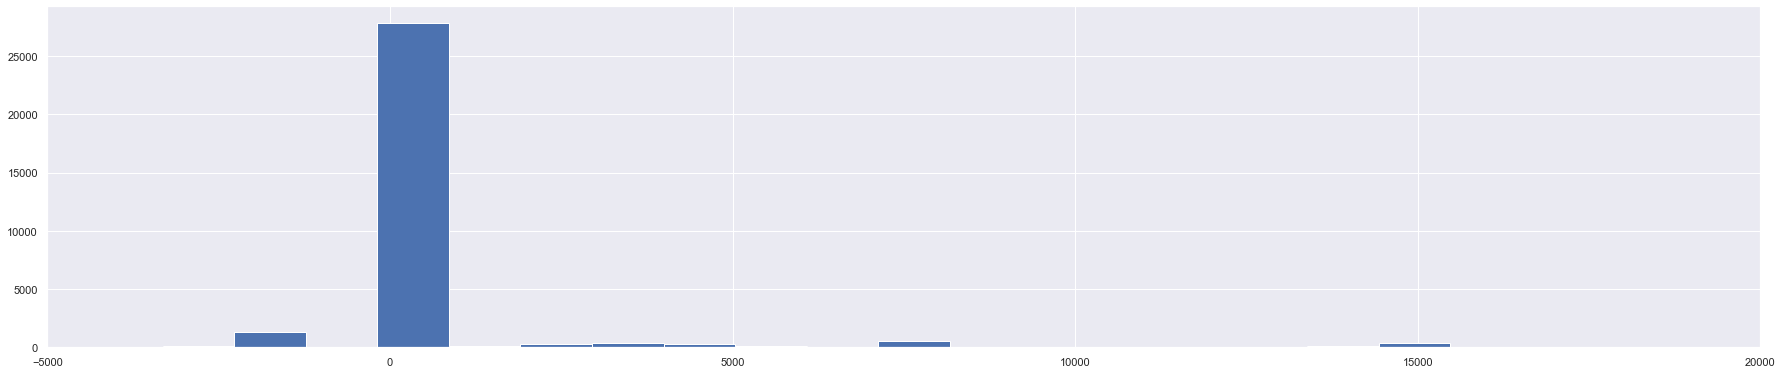

In [841]:
plt.xlim(-5000,20000)
plt.hist((train_data['capital-gain']-train_data['capital-loss']),bins=100)

In [ ]:
train_data['captial_diff']=train_data['capital-gain']-train_data['capital-loss']

In [ ]:
test_data['captial_diff']=test_data['capital-gain']-test_data['capital-loss']

Text(0.5, 1.0, 'Capital difference, ZERO values are not included for visualization')

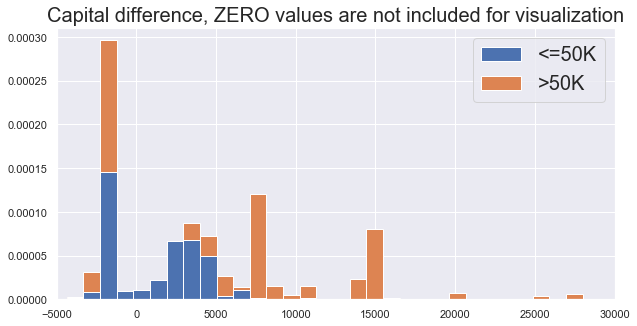

In [426]:
tmp=train_data[train_data.captial_diff!=0]
plt.hist([tmp[tmp.label_class==0].captial_diff,tmp[tmp.label_class==1].captial_diff],100, density=True, histtype='bar',label=['<=50K','>50K']\
         , stacked=True,weights=[tmp[tmp.label_class==0]\
.fnlwgt,tmp[tmp.label_class==1].fnlwgt])
plt.legend(prop={'size': 20})
plt.xlim(-5000,30000)
plt.title('Capital difference, ZERO values are not included for visualization',fontsize=20)


Text(0.5, 1.0, 'abs(Capital difference), ZERO values are not included for visualization')

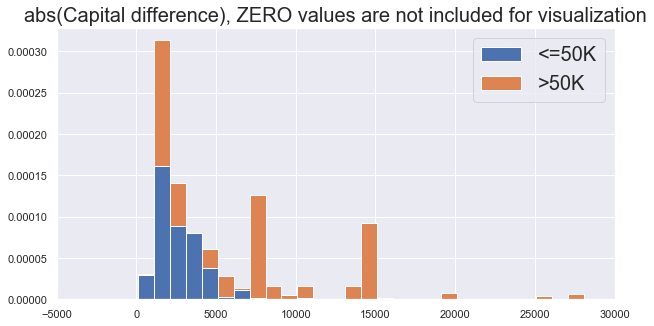

In [433]:
tmp2=train_data[train_data.captial_diff!=0]
tmp2.captial_diff=abs(tmp2.captial_diff)
plt.hist([tmp2[tmp2.label_class==0].captial_diff,tmp2[tmp2.label_class==1].captial_diff],100, density=True, histtype='bar',label=['<=50K','>50K']\
         , stacked=True,weights=[tmp2[tmp2.label_class==0]\
.fnlwgt,tmp2[tmp2.label_class==1].fnlwgt])
plt.legend(prop={'size': 20})
plt.xlim(-5000,30000)
plt.title('abs(Capital difference), ZERO values are not included for visualization',fontsize=20)

Text(0.5, 1.0, 'Weighted Capital difference at ZERO')

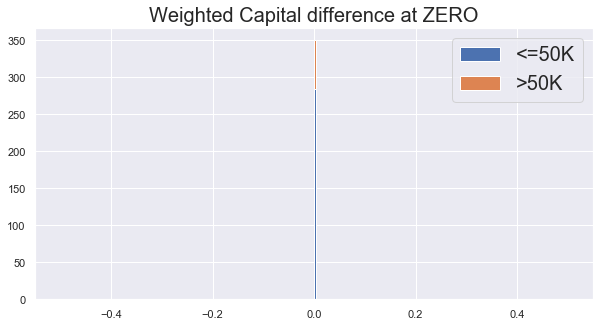

In [425]:
tmp=train_data[train_data.captial_diff==0]
plt.hist([tmp[tmp.label_class==0].captial_diff,tmp[tmp.label_class==1].captial_diff],350, density=True, histtype='bar',label=['<=50K','>50K']\
         , stacked=True,weights=[tmp[tmp.label_class==0]\
.fnlwgt,tmp[tmp.label_class==1].fnlwgt])
plt.legend(prop={'size': 20})
#plt.xlim(-5000,30000)
plt.title('Weighted Capital difference at ZERO',fontsize=20)

In [427]:
print('The numbef of Zero items in capitial differnce ={}\nThe none Zeros ones= {}'.format(train_data[train_data.captial_diff==0].count()['label_class'],train_data[train_data.captial_diff!=0].count()['label_class']))

The numbef of Zero items in capitial differnce =27837
The none Zeros ones= 4141


In [812]:
train_data.captial_diff.describe()

count    31978.000000
mean       977.621271
std       7322.256154
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: captial_diff, dtype: float64

### COMMENT: 
#### The trand is clear,  the groups that are higher and lower ends hold larger percentage of >50K values.  the larger the capital difference the higher percentage of the >50K class. 
#### The absolute plot of this variable is also checked, it does not make much difference, considering the vaue at zero is huge 
#### So from the plot, I group the values in to two groups, group 0 with range[-5000,5000] and the second group [5000, 100000]

In [434]:
train_data.loc[train_data.captial_diff<=5000,'captial_diff']=0
train_data.loc[train_data.captial_diff>5000,'captial_diff']=1

In [435]:
test_data.loc[test_data.captial_diff<=5000,'captial_diff']=0
test_data.loc[test_data.captial_diff>5000,'captial_diff']=1

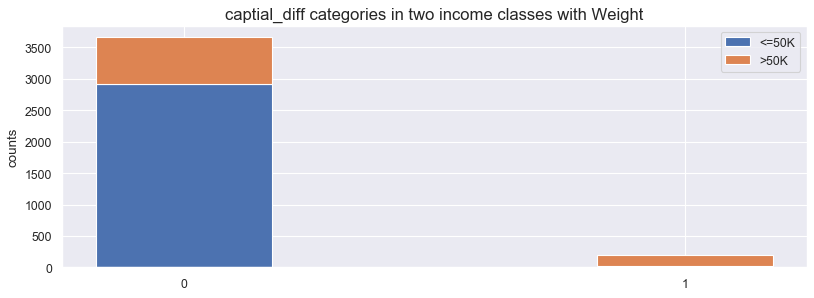

In [436]:
two_class_plot(train_data,2,'captial_diff',12)

### COMMENT:
#### the new distribution of captial difference after the regourp 

### 13. Variable hours-per-week study

Text(0.5, 1.0, 'Weighted hours-per-week difference')

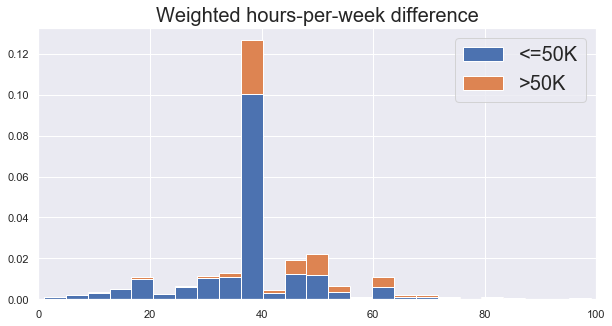

In [444]:
plt.hist([train_data[train_data.label_class==0]['hours-per-week'],train_data[train_data.label_class==1]['hours-per-week']],25, density=True, histtype='bar',label=['<=50K','>50K']\
         , stacked=True,weights=[train_data[train_data.label_class==0]\
.fnlwgt,train_data[train_data.label_class==1].fnlwgt])
plt.legend(prop={'size': 20})
plt.xlim(0,100)
plt.title('Weighted hours-per-week difference',fontsize=20)

Text(0.5, 1.0, 'Weighted hours-per-week without hours=40')

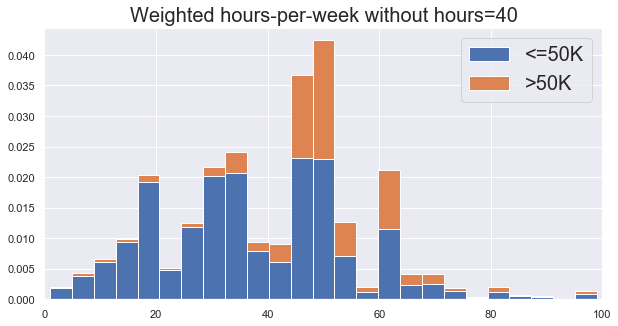

In [443]:
tmp=train_data[train_data['hours-per-week']!=40]
plt.hist([tmp[tmp.label_class==0]['hours-per-week'],tmp[tmp.label_class==1]['hours-per-week']],25, density=True, histtype='bar',label=['<=50K','>50K']\
         , stacked=True,weights=[tmp[tmp.label_class==0]\
.fnlwgt,tmp[tmp.label_class==1].fnlwgt])
plt.legend(prop={'size': 20})
plt.xlim(0,100)
plt.title('Weighted hours-per-week without hours=40',fontsize=20)

### COMMENT:
#### from the working time distribution above, two groups look resonable to me, group 0 hours<40, group 1 hours>=40

In [445]:
train_data.loc[train_data['hours-per-week']<40,'hours-per-week']=0
train_data.loc[train_data['hours-per-week']>=40,'hours-per-week']=1

In [446]:
test_data.loc[test_data['hours-per-week']<40,'hours-per-week']=0
test_data.loc[test_data['hours-per-week']>=40,'hours-per-week']=1

In [447]:
printsize()

(31978, 17) (31978, 15)


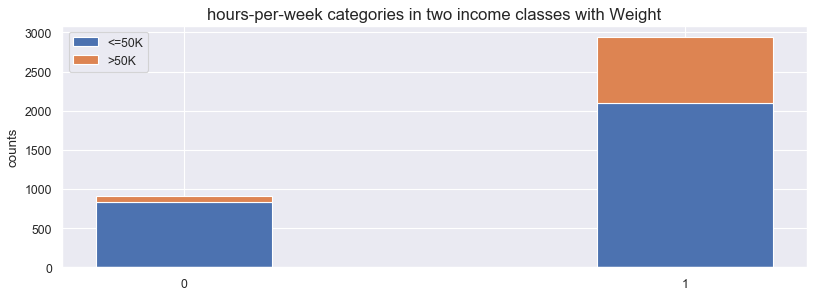

In [448]:
two_class_plot(train_data,2,'hours-per-week',12)

In [453]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,label_class,captial_diff
0,3,2,0.044302,0,2,0,0,1,0,0,2174,0,1,0,<=50K,0,0
1,2,2,0.048238,0,2,2,2,2,0,0,0,0,0,0,<=50K,0,0
2,3,1,0.138113,1,1,1,0,1,0,0,0,0,1,0,<=50K,0,0
3,2,1,0.151068,2,0,2,0,2,1,0,0,0,1,0,<=50K,0,0
4,4,1,0.221488,0,2,2,2,2,1,1,0,0,1,1,<=50K,0,0


In [454]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,label_class,captial_diff
0,4,1,0.144430,2,0,0,0,0,1,0,0,0,1,0,<=50K.,0,0
1,3,1,0.051677,1,1,2,0,2,0,0,0,0,1,0,<=50K.,0,0
2,4,2,0.219011,1,1,2,1,2,0,0,0,0,1,0,>50K.,1,0
3,3,1,0.099418,1,1,2,0,2,1,0,7688,0,1,0,>50K.,1,1
4,5,0,0.060942,1,1,0,0,0,0,1,0,0,0,0,<=50K.,0,0


In [451]:
tmp1=train_data
tmp2=test_data

In [455]:
train_data.drop(['capital-gain', 'capital-loss','class','education'], axis=1,inplace=True)
test_data.drop(['capital-gain', 'capital-loss','class','education'], axis=1,inplace=True)

In [458]:
train_data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,label_class,captial_diff
0,3,2,0.044302,2,0,0,1,0,0,1,0,0,0
1,2,2,0.048238,2,2,2,2,0,0,0,0,0,0
2,3,1,0.138113,1,1,0,1,0,0,1,0,0,0
3,2,1,0.151068,0,2,0,2,1,0,1,0,0,0
4,4,1,0.221488,2,2,2,2,1,1,1,1,0,0


In [459]:
test_data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,label_class,captial_diff
0,4,1,0.144430,0,0,0,0,1,0,1,0,0,0
1,3,1,0.051677,1,2,0,2,0,0,1,0,0,0
2,4,2,0.219011,1,2,1,2,0,0,1,0,1,0
3,3,1,0.099418,1,2,0,2,1,0,1,0,1,1
4,5,0,0.060942,1,0,0,0,0,1,0,0,0,0


In [460]:
train_data.keys()

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'label_class', 'captial_diff'],
      dtype='object')

In [461]:
train_data=train_data[['age', 'workclass', 'fnlwgt', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country', 'captial_diff','label_class']]


In [462]:
test_data=test_data[['age', 'workclass', 'fnlwgt', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country', 'captial_diff','label_class']]

## Part 3. Model training, testing and performance check

### Different models will be used, the SVM, Random forest, logistic regression, Naive bayes, Boosted Decision Tree

### 1. SVM classifer

In [465]:
from sklearn.metrics import confusion_matrix

In [466]:
from sklearn.metrics import roc_curve, auc

### Discusssion(imbalance in training and testing data):
#### The training and testing data are highly imblanced with respect to the two classes, during the grouping state, the >50K class with less events is paid more attention. The following reshaped training will be a new group, reduced the <=50K in number and seek to come to a balance with the other group

In [467]:
train_data.groupby('label_class').count()['age']

label_class
0    24283
1     7695
Name: age, dtype: int64

In [468]:
train_data_split_class0=train_data[train_data.label_class==0].sample(n=10000, random_state=1)

In [469]:
train_data_split_class1=train_data[train_data.label_class==1]
train_split= [train_data_split_class0,train_data_split_class1]
train_split = pd.concat(train_split)

In [470]:
test_data.groupby('label_class').count()['age']

label_class
0    12235
1     3772
Name: age, dtype: int64

In [471]:
test_data_split_class0=test_data[test_data.label_class==0].sample(n=3772, random_state=1)
test_data_split_class1=test_data[test_data.label_class==1]
test_split= [test_data_split_class0,test_data_split_class1]
test_split = pd.concat(test_split)


### DISCUSSION
#### As weight variable is used usually in the fit separately, split this varaible with the others

In [472]:
train_split_weight=train_split.fnlwgt
test_split_weight=test_split.fnlwgt

train_split_org=train_split
test_split_org=test_split

test_split.drop('fnlwgt',axis=1,inplace=True)
train_split.drop('fnlwgt',axis=1,inplace=True)

In [473]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
score=clf.fit(train_split.iloc[:,:-1], train_split.label_class,sample_weight=train_split_weight).decision_function(test_split.iloc[:,:-1])


In [474]:
fpr = dict()
tpr = dict()
roc_auc = dict()
accuracy=dict()

In [475]:
accuracy['SVM']=clf.score(test_split.iloc[:,:-1],test_split.label_class,sample_weight=test_split_weight)
fpr['SVM'], tpr['SVM'], _ = roc_curve(test_split.label_class, score)
roc_auc['SVM'] = auc(fpr['SVM'], tpr['SVM'])

In [476]:
print('the accucary of the SVM model without grid search is {:.2%}'.format(accuracy['SVM']))

the accucary of the SVM model without grid search is 82.12%


### SVM accuracy on test data is 82.1%

In [477]:
from sklearn.metrics import plot_confusion_matrix

In [478]:
def confusion_matrix_plot(Models,mathod_name):
    titles_options = [(mathod_name+" Confusion matrix, without normalization", None),
                      (mathod_name+" Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(Models,test_split.iloc[:,:-1],test_split.label_class,
                                 display_labels=['<=50K','>50K'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

SVM Confusion matrix, without normalization
[[3020  752]
 [ 645 3127]]
SVM Normalized confusion matrix
[[0.80063627 0.19936373]
 [0.17099682 0.82900318]]


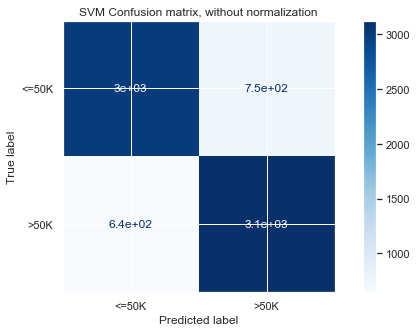

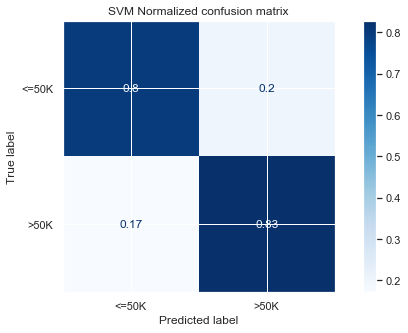

In [479]:
confusion_matrix_plot(clf,'SVM')

In [480]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(test_split.label_class,clf.predict(test_split.iloc[:,:-1]), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.80      0.81      3772
     class 1       0.81      0.83      0.82      3772

    accuracy                           0.81      7544
   macro avg       0.82      0.81      0.81      7544
weighted avg       0.82      0.81      0.81      7544



In [512]:
def AUROC_plot(method):
    plt.figure()
    lw = 2
    plt.plot(fpr[method], tpr[method], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[method])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of method ' +method,fontsize=20)
    plt.legend(loc="lower right",prop={'size': 20})
    plt.show()

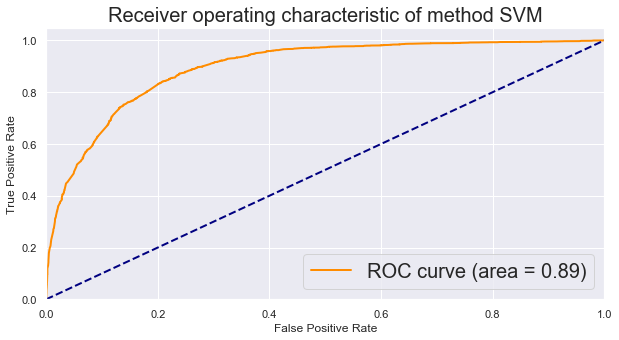

In [513]:
AUROC_plot('SVM')

### COMMENT: 
#### the SVM method in general behaves ok, with the adjustment of training data different class ratio,  a balanced precesion, and recall score is achieved, around 82%.  Over all, the SVM is ok from the value of AUROC, F1 score 

### 2. Logistic regression 

In [483]:
from sklearn.linear_model import LogisticRegression

In [484]:
clf_logistic = LogisticRegression(random_state=0).fit(train_split.iloc[:,:-1], train_split.label_class,sample_weight=train_split_weight)
clf_logistic.score(test_split.iloc[:,:-1],test_split.label_class,sample_weight=test_split_weight)


0.8134411702363598

In [485]:
def save_acc_and_roc(models,method):
    accuracy[method]=models.score(test_split.iloc[:,:-1],test_split.label_class,sample_weight=test_split_weight)
    fpr[method], tpr[method], _ = roc_curve(test_split.label_class, score)
    roc_auc[method] = auc(fpr[method], tpr[method])

In [486]:
save_acc_and_roc(clf_logistic,'Logistic')

In [487]:
print('the accucary of the Logistic regression model without grid search is {:.2%}'.format(accuracy['Logistic']))

the accucary of the Logistic regression model without grid search is 81.34%


###  Logistic regression accuracy on test data is 81.3%

Logistic Confusion matrix, without normalization
[[3082  690]
 [ 754 3018]]
Logistic Normalized confusion matrix
[[0.81707317 0.18292683]
 [0.19989396 0.80010604]]


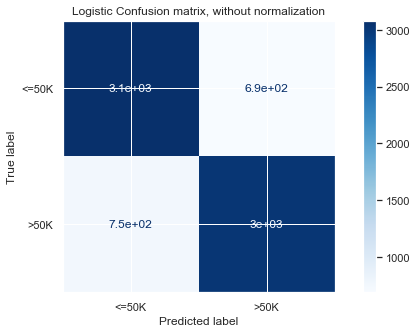

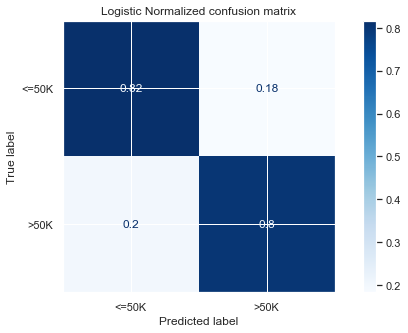

In [488]:
confusion_matrix_plot(clf_logistic,'Logistic')

In [489]:
print(classification_report(test_split.label_class,clf_logistic.predict(test_split.iloc[:,:-1]), target_names=target_names))



              precision    recall  f1-score   support

     class 0       0.80      0.82      0.81      3772
     class 1       0.81      0.80      0.81      3772

    accuracy                           0.81      7544
   macro avg       0.81      0.81      0.81      7544
weighted avg       0.81      0.81      0.81      7544



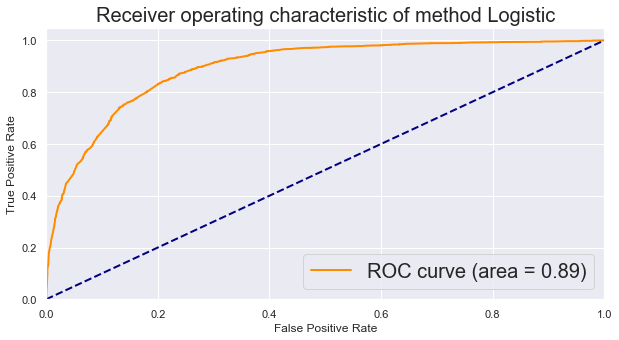

In [514]:
AUROC_plot('Logistic')

### COMMENT: 
#### Logistic regression behave very similar to SVM(without tuning), a bit less in f1 score

### 3. Naive bayes

In [491]:
from sklearn.naive_bayes import GaussianNB

In [492]:
gnb = GaussianNB()
gnb.fit(train_split.iloc[:,:-1], train_split.label_class,sample_weight=train_split_weight)
print('the accucary of the Naive bayes model  {:.2%}'.format(gnb.score(test_split.iloc[:,:-1],test_split.label_class,sample_weight=test_split_weight)))
      
      

the accucary of the Naive bayes model  79.40%


In [493]:
save_acc_and_roc(gnb,'NB')

NB Confusion matrix, without normalization
[[2985  787]
 [ 810 2962]]
NB Normalized confusion matrix
[[0.79135737 0.20864263]
 [0.21474019 0.78525981]]


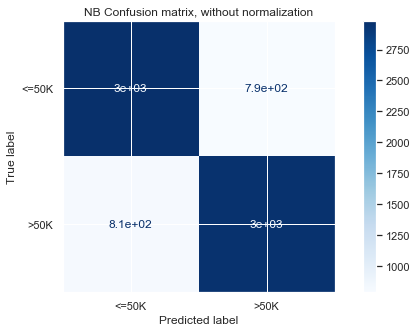

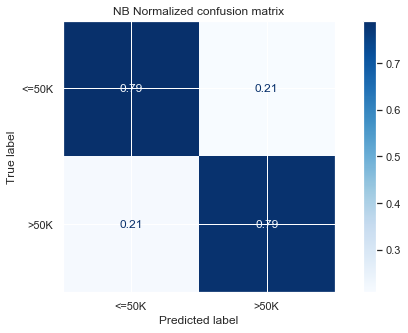

In [494]:
confusion_matrix_plot(gnb,'NB')

In [495]:
print(classification_report(test_split.label_class,gnb.predict(test_split.iloc[:,:-1]), target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.79      0.79      0.79      3772
     class 1       0.79      0.79      0.79      3772

    accuracy                           0.79      7544
   macro avg       0.79      0.79      0.79      7544
weighted avg       0.79      0.79      0.79      7544



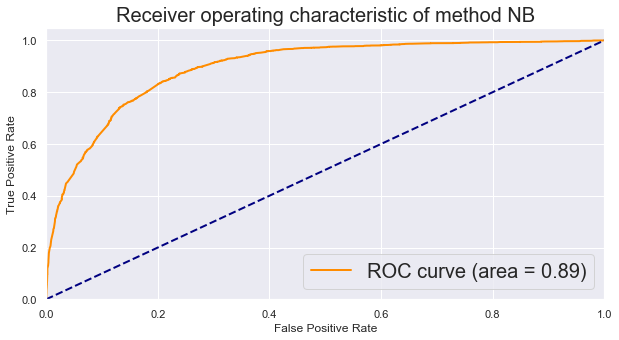

In [516]:
AUROC_plot('NB')

#### COMMENT:
#### Naive bayes has similar behaviour with respect the other two methods

### 4. Neuro Network

In [497]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(10,3), random_state=1,max_iter=3000)
NN.fit(train_split.iloc[:,:-1], train_split.label_class)
print('the accucary of the Neuro Network  {:.2%}'.format(NN.score(test_split.iloc[:,:-1],test_split.label_class)))


the accucary of the Neuro Network  81.30%


In [498]:
save_acc_and_roc(NN,'NN')

NN Confusion matrix, without normalization
[[3118  654]
 [ 757 3015]]
NN Normalized confusion matrix
[[0.82661718 0.17338282]
 [0.20068929 0.79931071]]


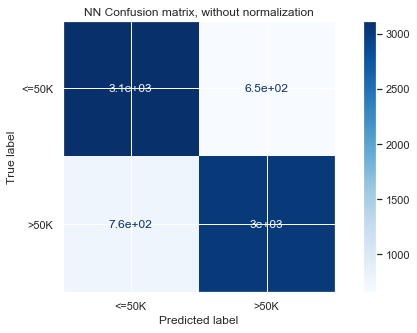

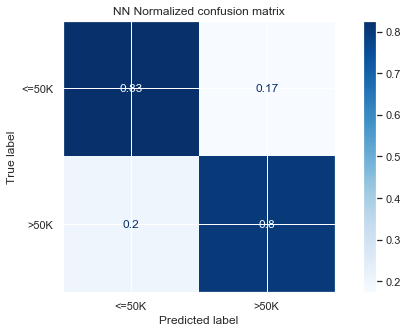

In [499]:
confusion_matrix_plot(NN,'NN')

In [500]:
print(classification_report(test_split.label_class,NN.predict(test_split.iloc[:,:-1]), target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.80      0.83      0.82      3772
     class 1       0.82      0.80      0.81      3772

    accuracy                           0.81      7544
   macro avg       0.81      0.81      0.81      7544
weighted avg       0.81      0.81      0.81      7544



### COMMENT: 
#### the untuned Neuro network hold similar behaviour with respect to previous methods


### DISCUSSION(grid search)
#### A not complete grid search on the NN

In [501]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [{'solver':['lbfgs','adam'],'hidden_layer_sizes':[(5,2),(8,2),(10,2),(5,3),(8,3),(12,3),(7,4)],}]
grid = GridSearchCV(MLPClassifier(alpha=1e-5,max_iter=3000), param_grid, refit=True, verbose=4)
grid.fit(train_data_split.iloc[:,:-1], train_data_split.label_class)

In [503]:
grid.best_params_

{'hidden_layer_sizes': (5, 2), 'solver': 'lbfgs'}

In [504]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5,2), random_state=1,max_iter=3000)
NN.fit(train_split.iloc[:,:-1], train_split.label_class)
print('the accucary of the Neuro Network  {:.2%}'.format(NN.score(test_split.iloc[:,:-1],test_split.label_class)))

the accucary of the Neuro Network  81.00%


### COMMENT: 
#### with the grid search on the optimizer and hidden_layer shape, the accuracy acctually get down a bit, as the options of hidden lays size are not much

### 5. RandomForest Method

In [505]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = [{'max_depth': [2,4,6,8,10,12,14,16],'min_samples_split':[2,4,6,8,10],'min_samples_leaf':[1,3,5,7,9]}]
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=4)
grid.fit(train_split.iloc[:,:-1], train_split.label_class,sample_weight=train_split_weight)
grid.best_params_
#grid_pred = grid.predict(X_test)

In [307]:
grid.best_params_


{'max_depth': 12, 'min_samples_leaf': 9, 'min_samples_split': 6}

In [507]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=12,min_samples_leaf=9,min_samples_split=6)
clf.fit(train_split.iloc[:,:-1], train_split.label_class,sample_weight=train_split_weight)
clf.score(test_split.iloc[:,:-1],test_split.label_class,sample_weight=test_split_weight)

0.8201987019616265

In [508]:
save_acc_and_roc(clf,'RFT')

RFT Confusion matrix, without normalization
[[3043  729]
 [ 660 3112]]
RFT Normalized confusion matrix
[[0.80673383 0.19326617]
 [0.17497349 0.82502651]]


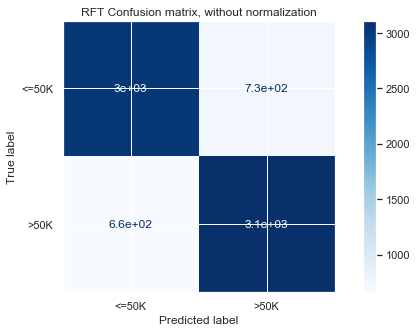

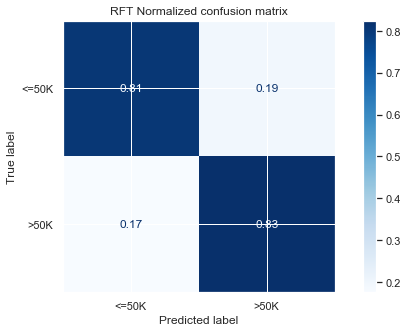

In [509]:
confusion_matrix_plot(clf,'RFT')

In [510]:
print(classification_report(test_split.label_class,NN.predict(test_split.iloc[:,:-1]), target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.79      0.85      0.82      3772
     class 1       0.83      0.77      0.80      3772

    accuracy                           0.81      7544
   macro avg       0.81      0.81      0.81      7544
weighted avg       0.81      0.81      0.81      7544



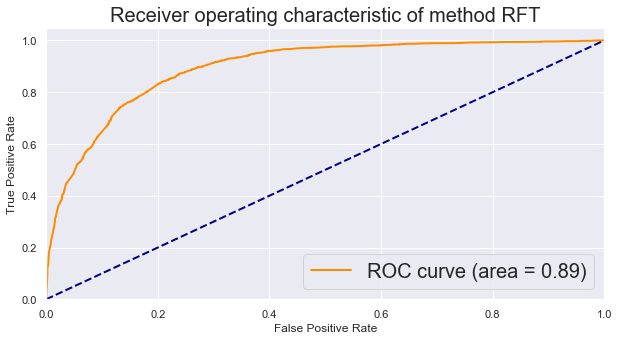

In [517]:
AUROC_plot('RFT')

### COMMENT: so far the Radom Forest and SVM behaves the best, round 82% of accuracy, but still similar to others

## Summary

### This study with the prediction of income. The training data is higly imbalanced, as to be consistant with the results from others, no test data is used in the training. In general 5 models are use, the SVM, Logistic regression, Navie bayes, Neuro Networks, Random Forest

### The behaviour of the above methods are similar, in both accuracy and AUROC. During the training, the balance is considered between the two classes, as the training sample, after adjust hold similar number of >50K and <=50K events

In [518]:
Lable_method=[]
value_acc=[]
for i,j in accuracy.items():
    Lable_method.append(i)
    value_acc.append(j)

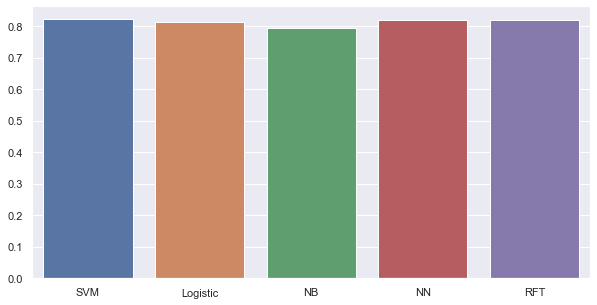

In [519]:
ax = sns.barplot(x=Lable_method, y=value_acc)

### while the AUROC is 90%